# Re-make $dC_\ell/dw_0$, $dC_\ell/dw_a$ using $P(z,k;w)g(z,k;w,\Delta w)$ - factorization version

In [1]:
import crosspower as cp
import FisherCl as fcl # branch quickCl
#import noiseCl as ncl
#import camb

# set plotting to be in the notebook instead of its own qt window
%matplotlib inline

IMPORT ERROR: /opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/quicklens/mpi.pyc (No module named pypar). Could not load pbs or pypar. MPI will not be used.


In [2]:
# load FisherMatrix objects
import FisherCl as fcl
import noiseCl as ncl
import crosspower as cp
import pickle

#filehandler_lin = open('Fisher_7_16O_wa1_chi.obj','r') # The chi-varied dw version
#filehandler_lin = open('Fisher_7_16O_wa1.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,

#filehandler_lin = open('Fisher_7_16Ochi.obj','r') # The chi-varied dw version
#filehandler_lin = open('Fisher_7_16O.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,
#neutrino_hierarchy = 'degenerate', usePrimaryCMB = True; dndzMode = 2 (Gold); from FisherCl branch quickCl
# set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True, nbar = 40
# uses nBins=16 bin version with beesBins v16; modified cp.byeBiasFit to use b(z)=1+z instead of standard 1+0.84*z
# shot noise without b^2, kk noise converted from pp (not dd), kk noise divided by 2.5
# fiducial w = -0.95; Casarini Halofit version

#filehandler_lin = open('Fisher_7_16N.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,
#neutrino_hierarchy = 'degenerate', usePrimaryCMB = True; dndzMode = 1 (kludged); from FisherCl branch quickCl
# kludge for this one: told cp.getDNDZinterp to use getDNDZM (Optimistic); set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True, nbar = 66
# uses nBins=16 bin version with beesBins v16; modified cp.byeBiasFit to use b(z)=1+z instead of standard 1+0.84*z
# shot noise without b^2, kk noise converted from pp (not dd), kk noise divided by 2.5
# fiducial w = -0.95; Casarini Halofit version

#filehandler_nln = open('Fisher_7_16M_wa1_chi.obj','r') # The chi-varied dw version
#filehandler_nln = open('Fisher_7_16M_wa1.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,

#filehandler_nln = open('Fisher_7_16Mchi.obj','r') # The chi-varied dw version
#filehandler_nln = open('Fisher_7_16M.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#neutrino_hierarchy = 'degenerate', usePrimaryCMB = True; dndzMode = 2 (Gold); from FisherCl branch quickCl
# set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True, nbar = 40
# uses nBins=16 bin version with beesBins v16; modified cp.byeBiasFit to use b(z)=1+z instead of standard 1+0.84*z
# shot noise without b^2, kk noise converted from pp (not dd), kk noise divided by 2.5
# fiducial w = -0.95; Casarini Halofit version

#filehandler_nln = open('Fisher_7_16Ln0.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#neutrino_hierarchy = 'degenerate', usePrimaryCMB = True; dndzMode = 1 (kludged); from FisherCl branch quickCl
# kludge for this one: told cp.getDNDZinterp to use getDNDZM (Optimistic); set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True, nbar = 66 ('n0' indicates fix)
# uses nBins=16 bin version with beesBins v16; modified cp.byeBiasFit to use b(z)=1+z instead of standard 1+0.84*z
# shot noise without b^2, kk noise converted from pp (not dd), kk noise divided by 2.5
# fiducial w = -0.95; Casarini Halofit version


# just pick the one I want (lin or nln; labeling may be wrong)
#filehandler_lin = open('Fisher_7_16Ln0.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#filehandler_lin = open('Fisher_7_16M_wa1.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#filehandler_lin = open('Fisher_7_16N.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,
filehandler_lin = open('Fisher_7_16O_wa1.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,


Fobj2 = pickle.load(filehandler_lin) 
#Fobj4 = pickle.load(filehandler_nln) 


lmin = Fobj2.lmin
lmax = Fobj2.lmax
nBins = Fobj2.nBins
nMaps = Fobj2.nBins + 1
nParams = Fobj2.nParams
nCosParams = Fobj2.nParams - Fobj2.nBins
ells = Fobj2.ells
obsNames = Fobj2.obsNames
paramList = Fobj2.paramList

print Fobj2.obsList
print Fobj2.obsNames
print Fobj2.paramList

print Fobj2.Fij.shape
print Fobj2.FijTE.shape
print Fobj2.nParams
print Fobj2.nCosParams

print Fobj2.lmin
print Fobj2.lmax

lminP = Fobj2.lminP
lmaxP = Fobj2.lmaxP
print lminP,lmaxP

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  36.  37.  38.  39.  40.  41.  42.  43.  44.
  45.  46.  47.  48.  49.  50.  54.  55.  56.  57.  58.  59.  60.  61.
  62.  63.  64.  65.  66.  67.  72.  73.  74.  75.  76.  77.  78.  79.
  80.  81.  82.  83.  84.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 108. 109. 110. 111. 112. 113. 114. 115. 116. 117. 118.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 144. 145. 146. 147.
 148. 149. 150. 151. 152. 162. 163. 164. 165. 166. 167. 168. 169. 180.
 181. 182. 183. 184. 185. 186. 198. 199. 200. 201. 202. 203. 216. 217.
 218. 219. 220. 234. 235. 236. 237. 252. 253. 254. 270. 271. 288.]
['k,k', 'k,g1', 'k,g2', 'k,g3', 'k,g4', 'k,g5', 'k,g6', 'k,g7', 'k,g8', 'k,g9', 'k,g10', 'k,g11', 'k,g12', 'k,g13', 'k,g14', 'k,g15', 'k,g16', 'g1,g1', 'g1,g2', 'g1,g3', 'g1,g4', 'g1,g5', 'g1,g6', 'g1,g7', 'g1,g8', 'g1,g9',

In [3]:
# get copies of the derivatives from the objects
#"""
#crossClsPlus2 = np.copy(Fobj2.crossClsPlus)
#crossClsMinus2 = np.copy(Fobj2.crossClsMinus)
#crossClsPPlus2 = np.copy(Fobj2.crossClsPPlus)
#crossClsPMinus2 = np.copy(Fobj2.crossClsPMinus)
dClVecs2 = np.copy(Fobj2.dClVecs)
#dClVecsP2 = np.copy(Fobj2.dClVecsP)

#crossClsPlus4 = np.copy(Fobj4.crossClsPlus)
#crossClsMinus4 = np.copy(Fobj4.crossClsMinus)
#crossClsPPlus4 = np.copy(Fobj4.crossClsPPlus)
#crossClsPMinus4 = np.copy(Fobj4.crossClsPMinus)
###dClVecs4 = np.copy(Fobj4.dClVecs)
#dClVecsP4 = np.copy(Fobj4.dClVecsP)

#print crossClsPlus2.shape,crossClsPlus4.shape
#print crossClsMinus2.shape,crossClsMinus4.shape
print dClVecs2.shape#, dClVecs4.shape

#print crossClsPPlus2.shape,crossClsPPlus4.shape
#print crossClsPMinus2.shape,crossClsPMinus4.shape
#print dClVecsP2.shape, dClVecsP4.shape
#"""

(153, 25, 2999)


In [4]:
import camb 

# get MatterPower objects
# get params for MatterPower from FisherMatrix:
def getPk(Fobj):
    return cp.MatterPower(nz=Fobj.nz,AccuracyBoost=Fobj.AccuracyBoost,nonlinear=Fobj.nonlinear,**Fobj.cosParams)
def getWin(Fobj,myPk):
    return cp.Window(myPk,zmin=Fobj.zmin,zmax=Fobj.zmax,nBins=Fobj.nBins,
               biasK=cp.ones,biasG=cp.byeBias,dndzMode=Fobj.dndzMode,z0=Fobj.z0,
               doNorm=Fobj.doNorm,useWk=Fobj.useWk,BPZ=Fobj.BPZ,binSmooth=Fobj.binSmooth,
               biasByBin=Fobj.biasByBin)

# set Halofit version
print 'setting Halofit to Casarini (Halofit ver. 7)'
camb.set_halofit_version('casarini')

print 'get linear P(k)...'
myPk2 = getPk(Fobj2)
#print 'get nonlinear P(k)...'
#myPk4 = getPk(Fobj4)

#chiOfZ2 = myPk2.getChiofZ()
#chiOfZ4 = myPk4.getChiofZ()

print 'done.'

setting Halofit to Casarini (Halofit ver. 7)
get linear P(k)...
neutrino_hierarchy =  degenerate
starting makePkInterp.


finishing makePkInterp.
done.


In [5]:
print Fobj2.dndzMode#,Fobj4.dndzMode
print Fobj2.nonlinear#,Fobj4.nonlinear

2
False


In [6]:
print paramList
print paramList[7:9]
for cParamNum in range(7,9):
    print paramList[cParamNum]

['ombh2', 'omch2', 'cosmomc_theta', 'As', 'ns', 'tau', 'mnu', 'w', 'wa', 'bin1', 'bin2', 'bin3', 'bin4', 'bin5', 'bin6', 'bin7', 'bin8', 'bin9', 'bin10', 'bin11', 'bin12', 'bin13', 'bin14', 'bin15', 'bin16']
['w', 'wa']
w
wa


In [7]:
# grab some code from FisherCl
tophatBins = True
AccuracyBoost = 3
lpa = 5.0 # set_for_lmax also sets lensing 
#get the total lensed CMB power spectra versus unlensed
#myClName = 'total'
myClName = 'unlensed_scalar'

# parameters list:
# step sizes for discrete derivatives: must correspond to paramList entries!
#   from Allison et. al. (2015) Table III.
nCosParams = 9 # 6 LCDM + Mnu + w0 + wa
paramList = ['ombh2','omch2','cosmomc_theta',  'As', 'ns','tau','mnu', 'w', 'wa']
#deltaP =    [ 0.0008, 0.0030,      0.0050e-2,0.1e-9,0.010,0.020,0.020,0.05,0.025] #mnu one in eV
deltaP =    [ 0.0008, 0.0030,      0.0050e-2,0.1e-9,0.010,0.020,0.020,0.05,  0.1] #mnu one in eV

# cut deltaP in half to match Byeonghee's step sizes
deltaP = np.array(deltaP)/2.0
    

print 'creating modified parameter lists . . . '
myParams = Fobj2.cosParams
myParamsUpper = []
myParamsLower = []
for cParamNum in range(nCosParams):
  # add parameter dictionary to lists; HAVE TO BE COPIES!!!
  myParamsUpper.append(myParams.copy())
  myParamsLower.append(myParams.copy())
  # modify parameter number cParamNum in ditionaries
  myParamsUpper[cParamNum][paramList[cParamNum]] += deltaP[cParamNum]
  myParamsLower[cParamNum][paramList[cParamNum]] -= deltaP[cParamNum]


creating modified parameter lists . . . 


# Get dg_i/dws

In [8]:
# load data needed for P(z,k) scaling
#myZs, myKs, dPdw0_ratio = np.load('dPdw0_ratio.npy')
#myZs, myKs, dPdwa_ratio = np.load('dPdwa_ratio.npy')
#myZs, myKs, dPdw0_ratio = np.load('dPdw0_avg_ex.npy')
#myZs, myKs, dPdwa_ratio = np.load('dPdwa_avg_ex.npy')
#myZs, myKs, dPdw0_ratio = np.load('dw0_avg_ex.npy')
#myZs, myKs, dPdwa_ratio = np.load('dwa_avg_ex.npy')
#myZs, myKs, dPdw0_ratio = np.load('g_0_ex.npy')
#myZs, myKs, dPdwa_ratio = np.load('g_a_ex.npy')
myZs, myKs, dPdw0_ratio = np.load('dPdw0_ex.npy')
myZs, myKs, dPdwa_ratio = np.load('dPdwa_ex.npy')
print 'done.'

done.


In [9]:
# create interpolation functions for them
from scipy.interpolate import RectBivariateSpline
dPdw0_interp = RectBivariateSpline(myZs,myKs,dPdw0_ratio)
dPdwa_interp = RectBivariateSpline(myZs,myKs,dPdwa_ratio)

print 'done.'

done.


In [10]:
print paramList[7]

w


In [11]:
# re-make derivatives
#dClVecs2[mapIdx, pIdx]
#dClVecs4[mapIdx, pIdx]

# the z,k values used to make the P(z,k) interpolators
#myZs2 = myPk2.zArray
#myKs2 = myPk2.kArray
#myZs4 = myPk4.zArray
#myKs4 = myPk4.kArray

print 'ok'

ok


In [12]:
print myPk2.zstar,myPk4.zstar

1088.4400579363114 1089.5587497334752


In [13]:
# get z- and k-limits for integration
binEdges = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.3, 2.6, 3.0, 3.5, 4.0, 7.0, 1089.6]

kmax1 = 0.15
kmax2 = 0.30

kmin = 1e-4 # from crosspower.getCl

# ok, how about some ell-limits too?
chiOfZ2 = myPk2.getChiofZ()
chiOfZ4 = myPk4.getChiofZ()

myLmax2 = lambda kmax: np.floor(kmax*chiOfZ2(binEdges)-0.5).astype(int)
myLmax4 = lambda kmax: np.floor(kmax*chiOfZ4(binEdges)-0.5).astype(int)



In [14]:
# get containers to store 17 bins * (kmax1,kmax2)* (num,denom(linear),denom(nonlinear)) 
#   why no nonlinear numerator?  Just haven't had the need for that yet.
# use two pieces for w0, wa
integ_w0 = np.empty((17,2,3))
integ_wa = np.empty((17,2,3))
#print integ_w0.shape

In [15]:
kArray1 = np.logspace(kmin,kmax1,1000)
kArray2 = np.logspace(kmin,kmax2,1000)
deltaK1 = kArray1[1:]-kArray2[:-1]
deltaK2 = kArray2[1:]-kArray2[:-1]
kMids1 = (kArray1[1:]+kArray2[:-1])/2
kMids2 = (kArray2[1:]+kArray2[:-1])/2

deltaKs = [deltaK1,deltaK2]
kMids = [kMids1,kMids2]

for binNum in range(17):
    zArray = np.linspace(binEdges[binNum],binEdges[binNum+1],100)
    deltaZ = zArray[1:]-zArray[:-1]
    zMids = (zArray[1:]+zArray[:-1])/2
    for kmaxNum,kmax in enumerate((kmax1,kmax2)):
        #print binNum, kmax
        
        # sample dPdw and P
        dPdw0 = dPdw0_interp(zMids,kMids[kmaxNum],grid=True)
        dPdwa = dPdwa_interp(zMids,kMids[kmaxNum],grid=True)
        Pzk2 = myPk2.PK.P(zMids,kMids[kmaxNum],grid=True)
        Pzk4 = myPk4.PK.P(zMids,kMids[kmaxNum],grid=True)
        #print dPdw0.shape,dPdwa.shape,Pzk2.shape,Pzk4.shape
        
        # k-integrate
        dPdw0_dk = np.dot(dPdw0,kMids[kmaxNum]*deltaKs[kmaxNum])
        dPdwa_dk = np.dot(dPdwa,kMids[kmaxNum]*deltaKs[kmaxNum])
        Pzk2_dk = np.dot(Pzk2,kMids[kmaxNum]*deltaKs[kmaxNum])
        Pzk4_dk = np.dot(Pzk4,kMids[kmaxNum]*deltaKs[kmaxNum])
        #print dPdw0_dk.shape,dPdwa_dk.shape,Pzk2_dk.shape,Pzk4_dk.shape
        
        # z-integrate
        dPdw0_dkdz = np.dot(dPdw0_dk,zMids*deltaZ)
        dPdwa_dkdz = np.dot(dPdwa_dk,zMids*deltaZ)
        Pzk2_dkdz = np.dot(Pzk2_dk,zMids*deltaZ)
        Pzk4_dkdz = np.dot(Pzk4_dk,zMids*deltaZ)
        #print dPdw0_dkdz,dPdwa_dkdz,Pzk2_dkdz,Pzk4_dkdz
        
        integ_w0[binNum,kmaxNum,0] = dPdw0_dkdz
        integ_w0[binNum,kmaxNum,1] = Pzk2_dkdz
        integ_w0[binNum,kmaxNum,2] = Pzk4_dkdz
        
        integ_wa[binNum,kmaxNum,0] = dPdwa_dkdz
        integ_wa[binNum,kmaxNum,1] = Pzk2_dkdz
        integ_wa[binNum,kmaxNum,2] = Pzk4_dkdz
        
print 'done.'        

done.


In [16]:
# get ratios
# shape (17 bins) * (kmax1,kmax2)* (linear,nonlinear)
dgidw0 = np.empty((17,2,2))
dgidwa = np.empty((17,2,2))

dgidw0[:,:,0] = integ_w0[:,:,0]/integ_w0[:,:,1]
dgidw0[:,:,1] = integ_w0[:,:,0]/integ_w0[:,:,2]
dgidwa[:,:,0] = integ_wa[:,:,0]/integ_wa[:,:,1]
dgidwa[:,:,1] = integ_wa[:,:,0]/integ_wa[:,:,2]

print 'done.'

done.


In [17]:
# bin17 is for 7<z<z*, needed for creating total
# find total now.
# shape (kmax1,kmax2)* (linear,nonlinear)
dgidw0_all = np.empty((2,2))
dgidwa_all = np.empty((2,2))

dgidw0_all[:,0] = np.sum(integ_w0,axis=0)[:,0]/np.sum(integ_w0,axis=0)[:,1]
dgidw0_all[:,1] = np.sum(integ_w0,axis=0)[:,0]/np.sum(integ_w0,axis=0)[:,2]
dgidwa_all[:,0] = np.sum(integ_wa,axis=0)[:,0]/np.sum(integ_wa,axis=0)[:,1]
dgidwa_all[:,1] = np.sum(integ_wa,axis=0)[:,0]/np.sum(integ_wa,axis=0)[:,2]

print 'done.'

done.


# Create w-derivatives that vary pzk, fix chi

In [18]:
# (Unless I loaded a file that already had chi modified...)

In [19]:
crossCls2 = np.copy(Fobj2.crossCls)
crossCls4 = np.copy(Fobj4.crossCls)
print crossCls2.shape,crossCls4.shape

dClVecs2_k1 = np.copy(Fobj2.dClVecs)
dClVecs2_k2 = np.copy(Fobj2.dClVecs)
dClVecs4_k1 = np.copy(Fobj4.dClVecs)
dClVecs4_k2 = np.copy(Fobj4.dClVecs)
print dClVecs2_k1.shape,dClVecs2_k2.shape,dClVecs4_k1.shape,dClVecs4_k2.shape

# observables, parameters, ells
# need to replace w0,wa derivatives in parameter indices 7,8

(17, 17, 2999) (17, 17, 2999)
(153, 25, 2999) (153, 25, 2999) (153, 25, 2999) (153, 25, 2999)


In [20]:
# start with kk
w0Index = 7
waIndex = 8

# true for pzkamp only, false for pzkamp + chi
#amponly = True
amponly = False

if amponly:
    # for pzk amponly
    dClVecs2_k1[0,w0Index] = crossCls2[0,0]*dgidw0_all[0,0]
    dClVecs2_k2[0,w0Index] = crossCls2[0,0]*dgidw0_all[1,0]
    dClVecs4_k1[0,w0Index] = crossCls4[0,0]*dgidw0_all[0,1]
    dClVecs4_k2[0,w0Index] = crossCls4[0,0]*dgidw0_all[1,1]

    dClVecs2_k1[0,waIndex] = crossCls2[0,0]*dgidwa_all[0,0]
    dClVecs2_k2[0,waIndex] = crossCls2[0,0]*dgidwa_all[1,0]
    dClVecs4_k1[0,waIndex] = crossCls4[0,0]*dgidwa_all[0,1]
    dClVecs4_k2[0,waIndex] = crossCls4[0,0]*dgidwa_all[1,1]

else:
    # for chi+pzkamp
    dClVecs2_k1[0,w0Index] += crossCls2[0,0]*dgidw0_all[0,0]
    dClVecs2_k2[0,w0Index] += crossCls2[0,0]*dgidw0_all[1,0]
    dClVecs4_k1[0,w0Index] += crossCls4[0,0]*dgidw0_all[0,1]
    dClVecs4_k2[0,w0Index] += crossCls4[0,0]*dgidw0_all[1,1]

    dClVecs2_k1[0,waIndex] += crossCls2[0,0]*dgidwa_all[0,0]
    dClVecs2_k2[0,waIndex] += crossCls2[0,0]*dgidwa_all[1,0]
    dClVecs4_k1[0,waIndex] += crossCls4[0,0]*dgidwa_all[0,1]
    dClVecs4_k2[0,waIndex] += crossCls4[0,0]*dgidwa_all[1,1]


In [21]:
# next the kg
for binNum in range(1,17):
    if amponly:
        dClVecs2_k1[binNum,w0Index] = crossCls2[0,binNum]*dgidw0[binNum-1,0,0]
        dClVecs2_k2[binNum,w0Index] = crossCls2[0,binNum]*dgidw0[binNum-1,1,0]
        dClVecs4_k1[binNum,w0Index] = crossCls4[0,binNum]*dgidw0[binNum-1,0,1]
        dClVecs4_k2[binNum,w0Index] = crossCls4[0,binNum]*dgidw0[binNum-1,1,1]

        dClVecs2_k1[binNum,waIndex] = crossCls2[0,binNum]*dgidwa[binNum-1,0,0]
        dClVecs2_k2[binNum,waIndex] = crossCls2[0,binNum]*dgidwa[binNum-1,1,0]
        dClVecs4_k1[binNum,waIndex] = crossCls4[0,binNum]*dgidwa[binNum-1,0,1]
        dClVecs4_k2[binNum,waIndex] = crossCls4[0,binNum]*dgidwa[binNum-1,1,1]
        
    else:
        dClVecs2_k1[binNum,w0Index] += crossCls2[0,binNum]*dgidw0[binNum-1,0,0]
        dClVecs2_k2[binNum,w0Index] += crossCls2[0,binNum]*dgidw0[binNum-1,1,0]
        dClVecs4_k1[binNum,w0Index] += crossCls4[0,binNum]*dgidw0[binNum-1,0,1]
        dClVecs4_k2[binNum,w0Index] += crossCls4[0,binNum]*dgidw0[binNum-1,1,1]

        dClVecs2_k1[binNum,waIndex] += crossCls2[0,binNum]*dgidwa[binNum-1,0,0]
        dClVecs2_k2[binNum,waIndex] += crossCls2[0,binNum]*dgidwa[binNum-1,1,0]
        dClVecs4_k1[binNum,waIndex] += crossCls4[0,binNum]*dgidwa[binNum-1,0,1]
        dClVecs4_k2[binNum,waIndex] += crossCls4[0,binNum]*dgidwa[binNum-1,1,1]
print 'done.'

done.


In [22]:
# find indices of autospectra
nMaps = 17
gg_indices = []
for map1 in range(nMaps):
    #print 'starting derivative set ',map1+1,' of ',nMaps,'... '
    for map2 in range(map1,nMaps):
        mapIdx  = map1*nMaps+map2 -map1*(map1+1)/2     # mapIdx = map index
        #print mapIdx
        if map1==map2:
            gg_indices.append(mapIdx)

print gg_indices

[0, 17, 33, 48, 62, 75, 87, 98, 108, 117, 125, 132, 138, 143, 147, 150, 152]


In [23]:
# next the gg
for binNum,binIndex in enumerate(gg_indices[1:]):
    print binIndex,binNum+1
    if amponly:
        dClVecs2_k1[binIndex,w0Index] = crossCls2[binNum+1,binNum+1]*dgidw0[binNum,0,0]
        dClVecs2_k2[binIndex,w0Index] = crossCls2[binNum+1,binNum+1]*dgidw0[binNum,1,0]
        dClVecs4_k1[binIndex,w0Index] = crossCls4[binNum+1,binNum+1]*dgidw0[binNum,0,1]
        dClVecs4_k2[binIndex,w0Index] = crossCls4[binNum+1,binNum+1]*dgidw0[binNum,1,1]

        dClVecs2_k1[binIndex,waIndex] = crossCls2[binNum+1,binNum+1]*dgidwa[binNum,0,0]
        dClVecs2_k2[binIndex,waIndex] = crossCls2[binNum+1,binNum+1]*dgidwa[binNum,1,0]
        dClVecs4_k1[binIndex,waIndex] = crossCls4[binNum+1,binNum+1]*dgidwa[binNum,0,1]
        dClVecs4_k2[binIndex,waIndex] = crossCls4[binNum+1,binNum+1]*dgidwa[binNum,1,1]
        
    else:
        dClVecs2_k1[binIndex,w0Index] += crossCls2[binNum+1,binNum+1]*dgidw0[binNum,0,0]
        dClVecs2_k2[binIndex,w0Index] += crossCls2[binNum+1,binNum+1]*dgidw0[binNum,1,0]
        dClVecs4_k1[binIndex,w0Index] += crossCls4[binNum+1,binNum+1]*dgidw0[binNum,0,1]
        dClVecs4_k2[binIndex,w0Index] += crossCls4[binNum+1,binNum+1]*dgidw0[binNum,1,1]

        dClVecs2_k1[binIndex,waIndex] += crossCls2[binNum+1,binNum+1]*dgidwa[binNum,0,0]
        dClVecs2_k2[binIndex,waIndex] += crossCls2[binNum+1,binNum+1]*dgidwa[binNum,1,0]
        dClVecs4_k1[binIndex,waIndex] += crossCls4[binNum+1,binNum+1]*dgidwa[binNum,0,1]
        dClVecs4_k2[binIndex,waIndex] += crossCls4[binNum+1,binNum+1]*dgidwa[binNum,1,1]

print 'done.'

17 1
33 2
48 3
62 4
75 5
87 6
98 7
108 8
117 9
125 10
132 11
138 12
143 13
147 14
150 15
152 16
done.


# make some plots

In [24]:
nToPlot = 17 # kk and kg at beginning of array

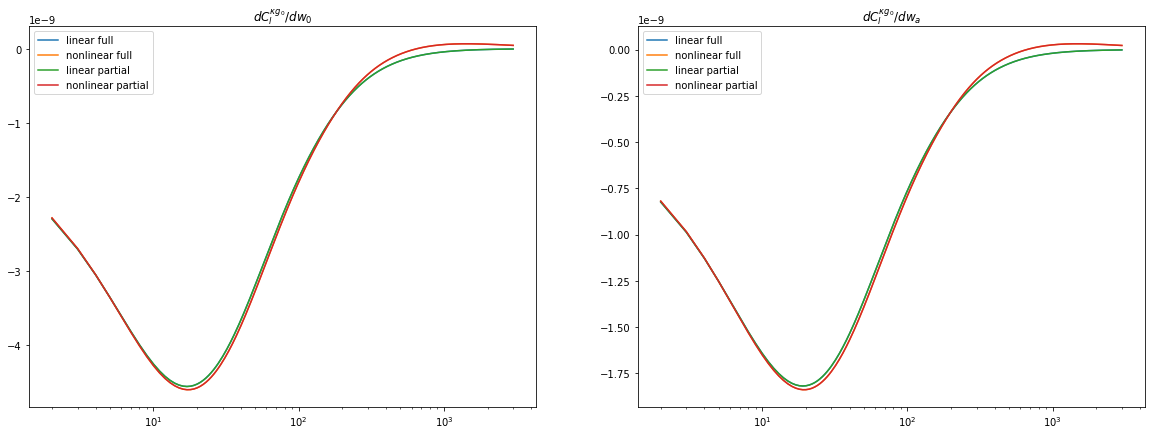

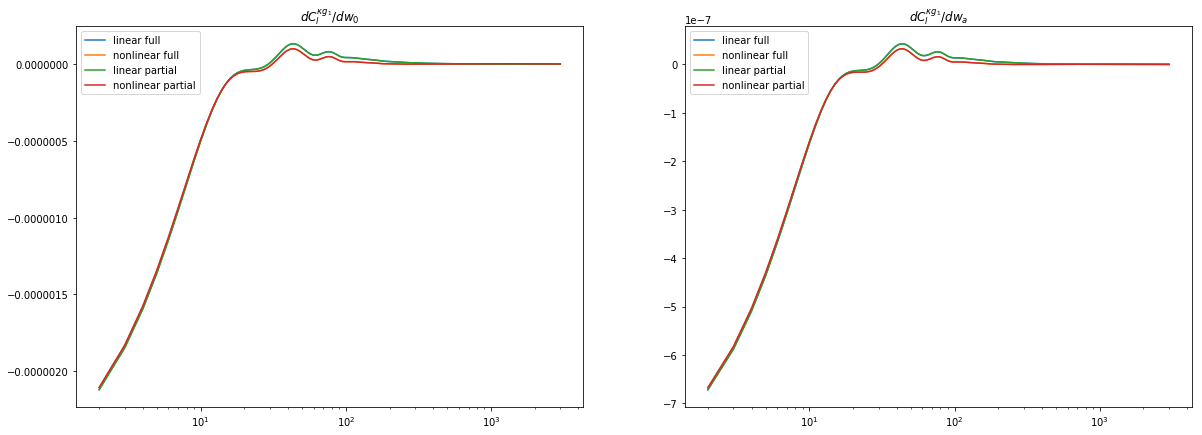

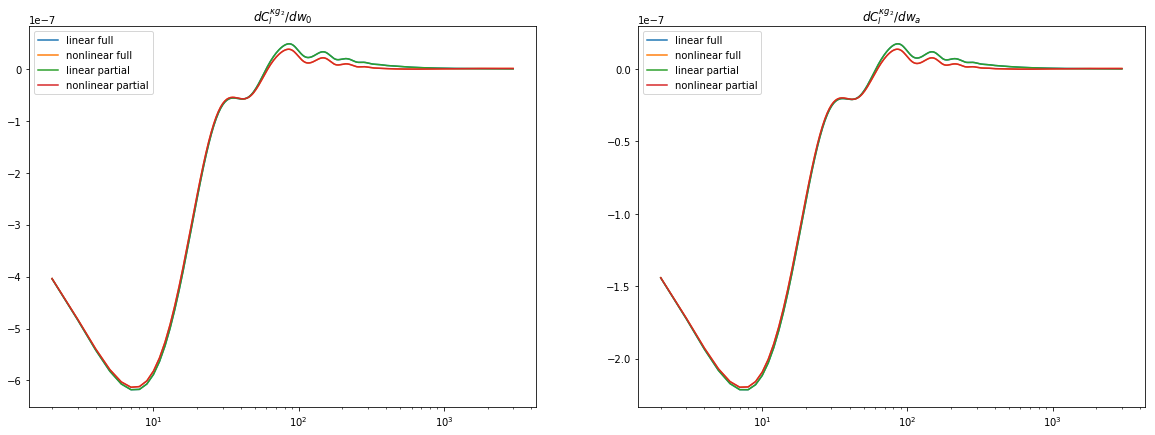

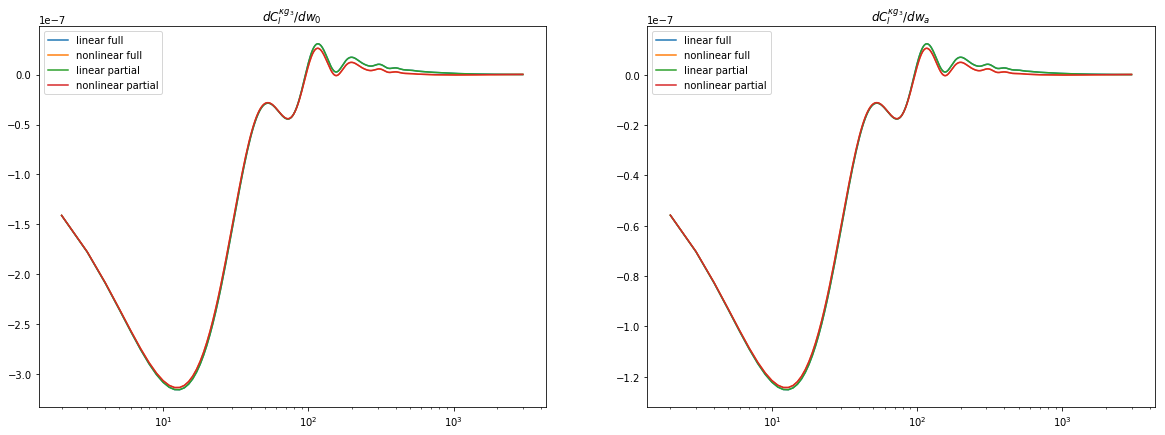

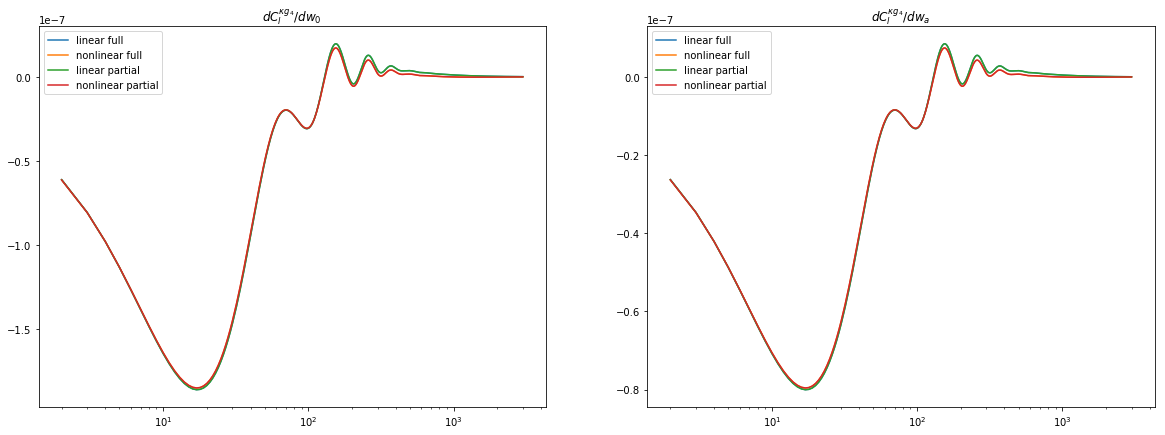

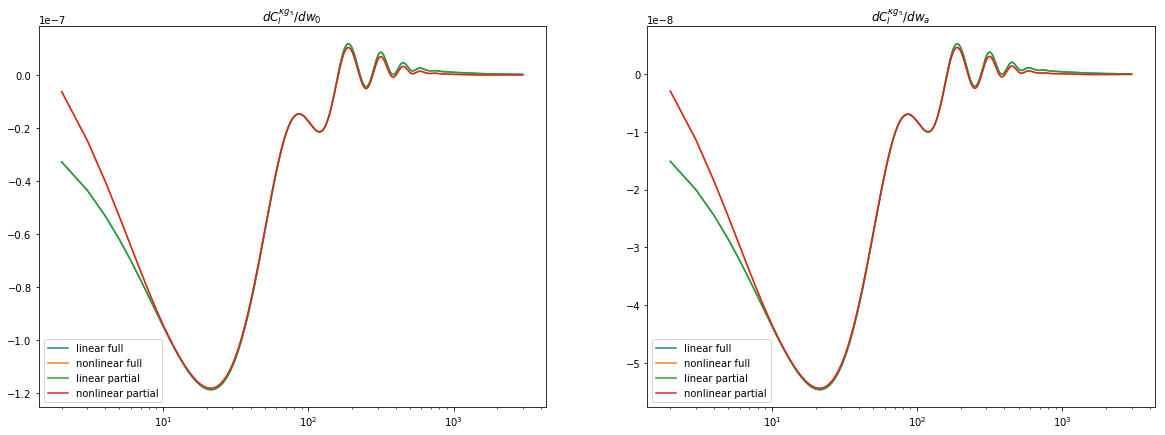

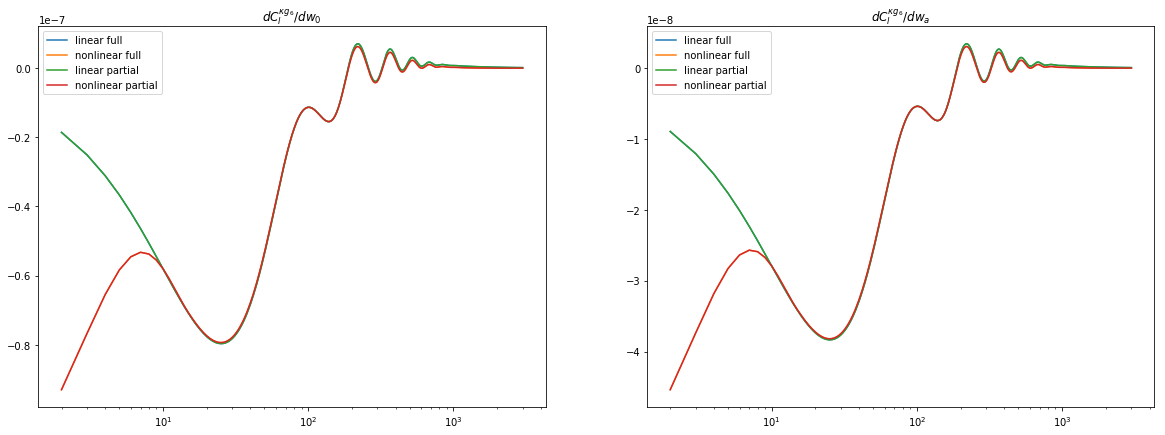

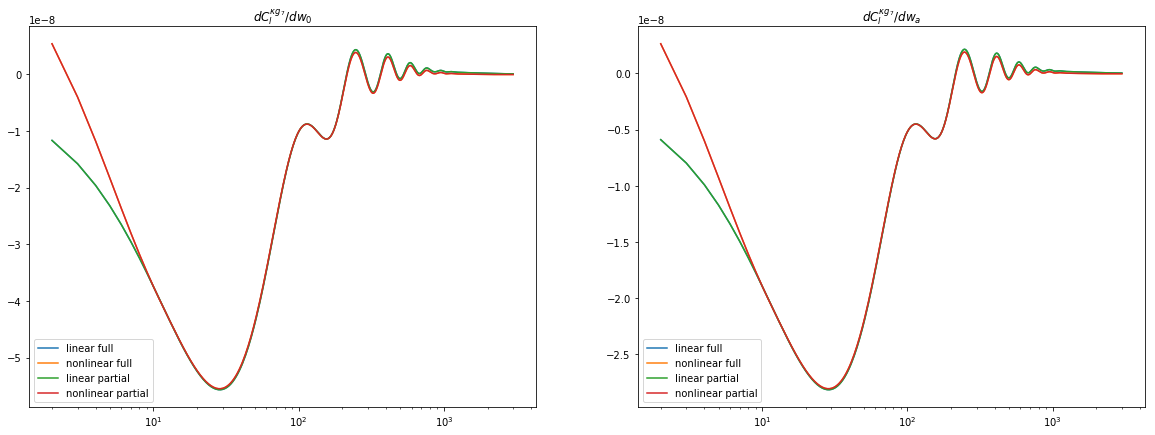

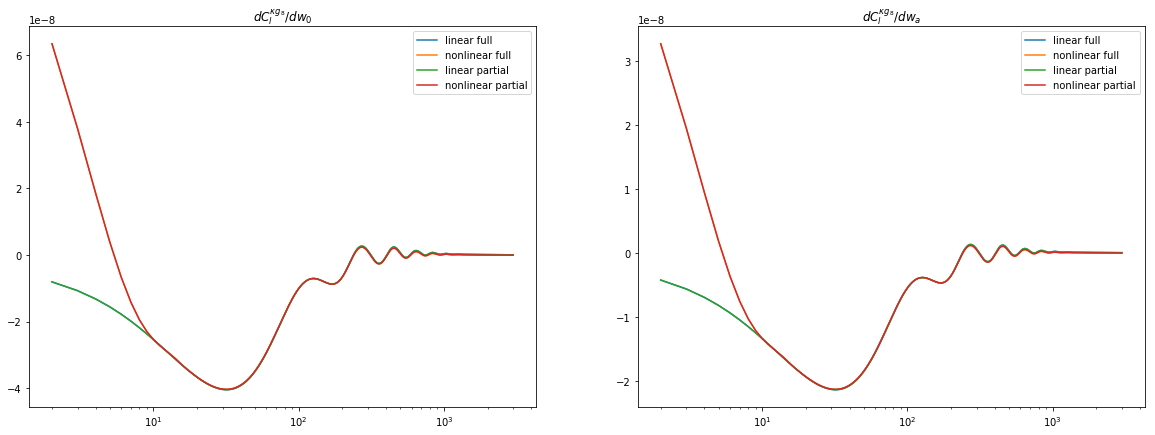

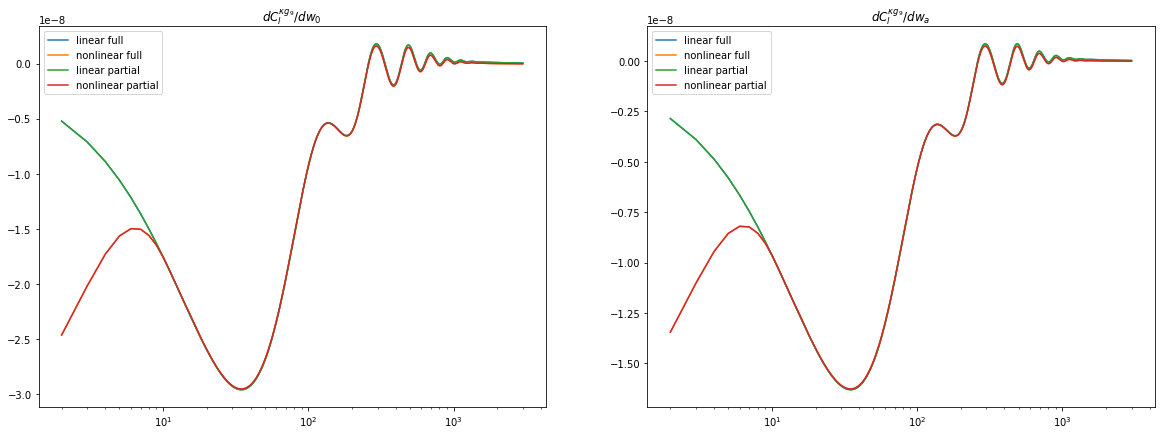

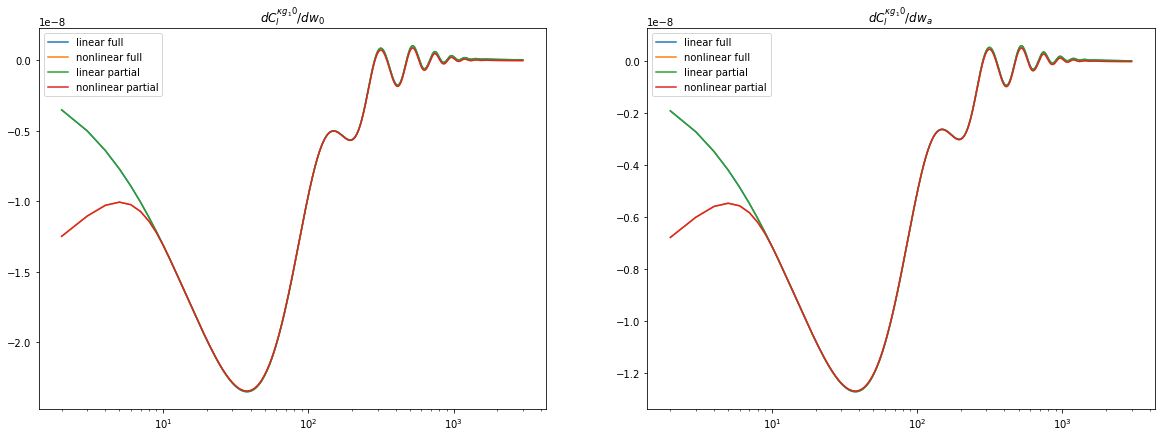

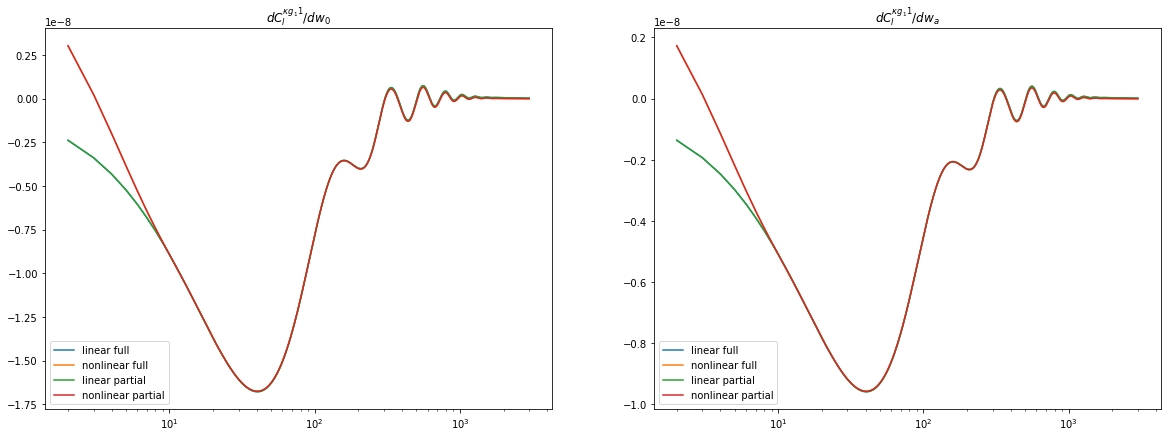

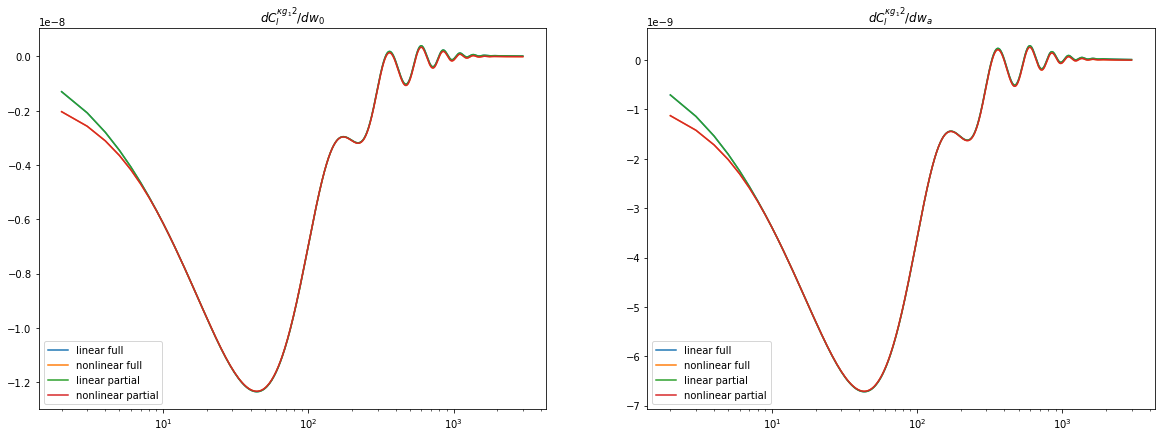

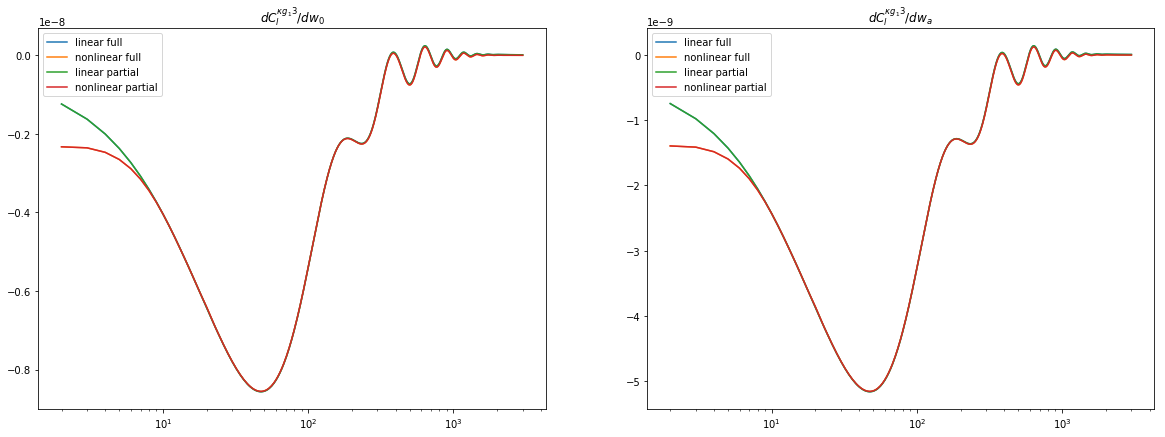

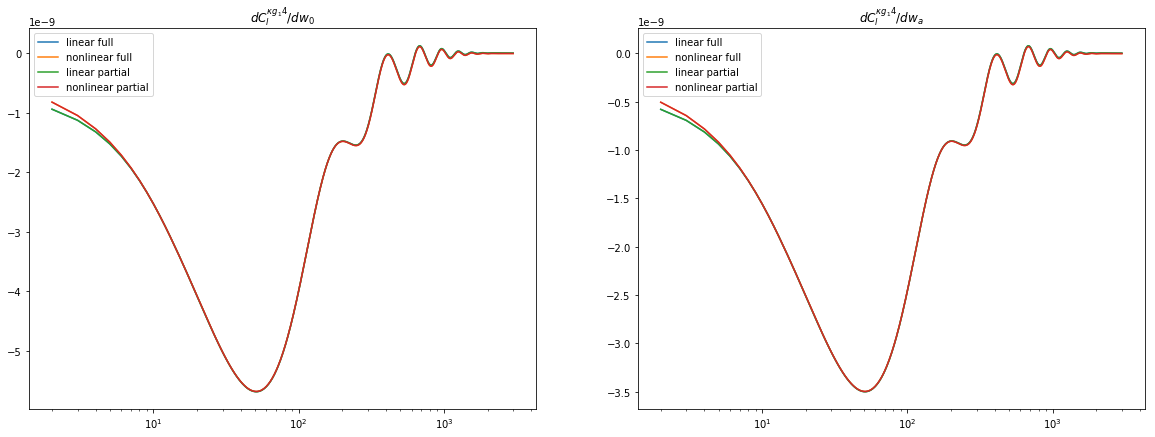

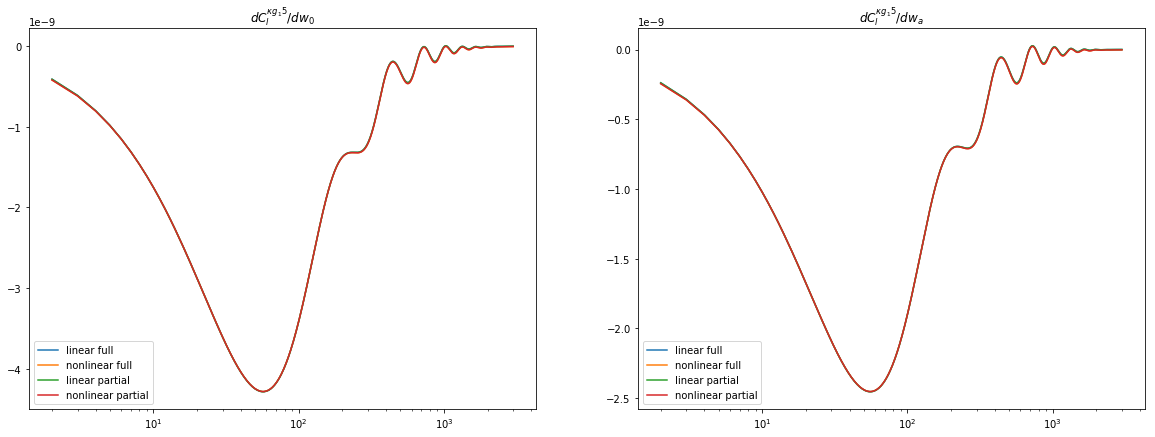

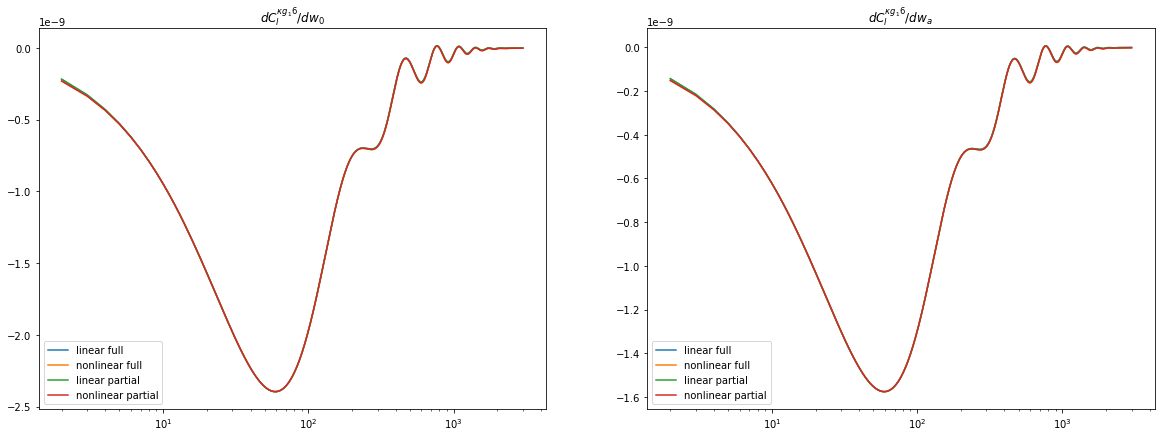

In [25]:
# look at some dCl/dw, dCl/dwa curves
w0Num = 7; waNum = 8
for specNum in range(nToPlot):
    fig = plt.figure(figsize=(20, 7))
    
    plt.subplot(1, 2, 1)
    plt.semilogx(ells,Fobj2.dClVecs[specNum,w0Num],label='linear full')
    plt.semilogx(ells,Fobj4.dClVecs[specNum,w0Num],label='nonlinear full')
    plt.semilogx(ells,dClVecs2[specNum,w0Num],label='linear partial')
    plt.semilogx(ells,dClVecs4[specNum,w0Num],label='nonlinear partial')
    plt.legend()
    plt.title(r'$dC_l^{{\kappa g_{0} }}/dw_0$'.format(specNum))
    #plt.show()
    
    plt.subplot(1, 2, 2)
    plt.semilogx(ells,Fobj2.dClVecs[specNum,waNum],label='linear full')
    plt.semilogx(ells,Fobj4.dClVecs[specNum,waNum],label='nonlinear full')
    plt.semilogx(ells,dClVecs2[specNum,waNum],label='linear partial')
    plt.semilogx(ells,dClVecs4[specNum,waNum],label='nonlinear partial')
    plt.legend()
    plt.title(r'$dC_l^{{\kappa g_{0} }}/dw_a$'.format(specNum))
    plt.show()
    

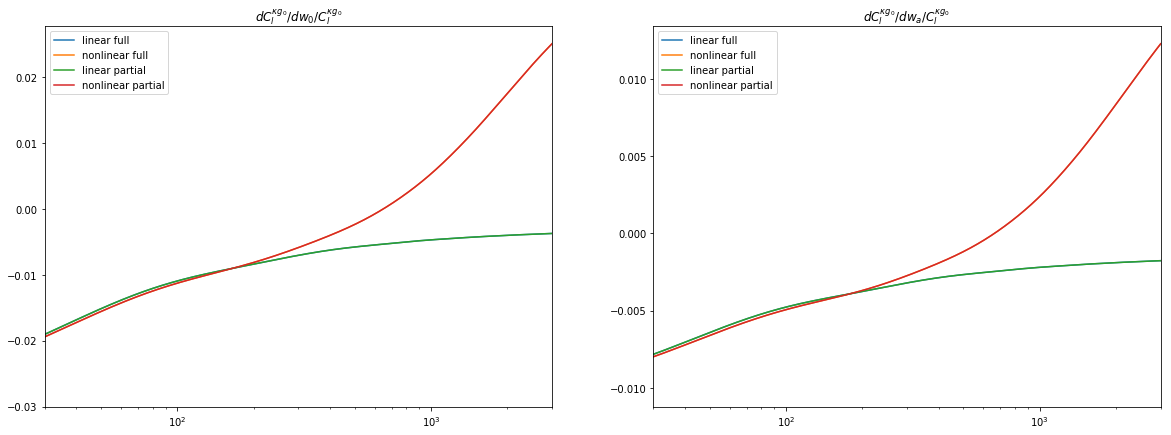

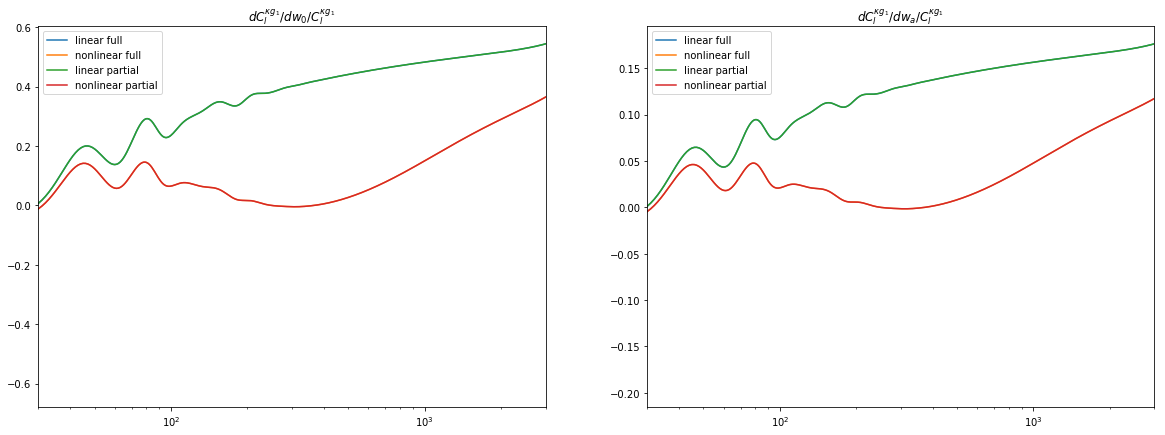

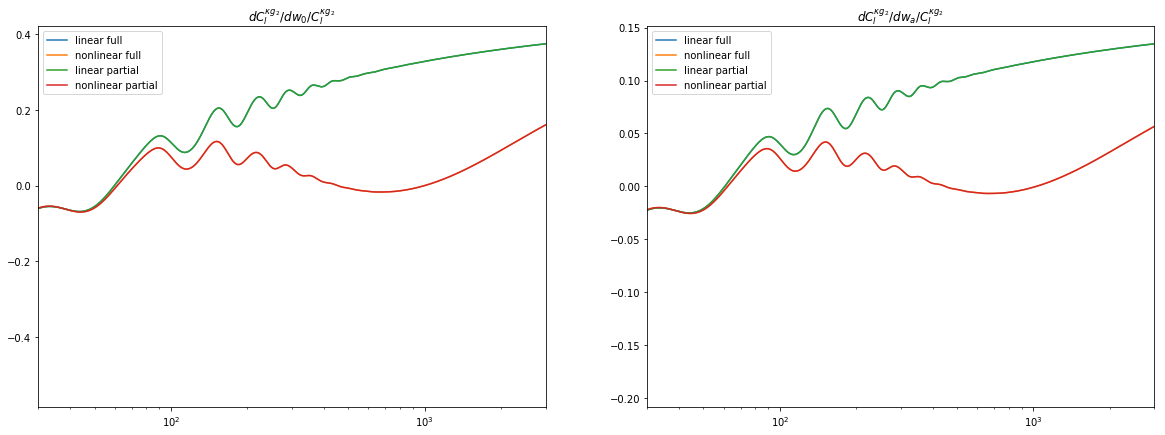

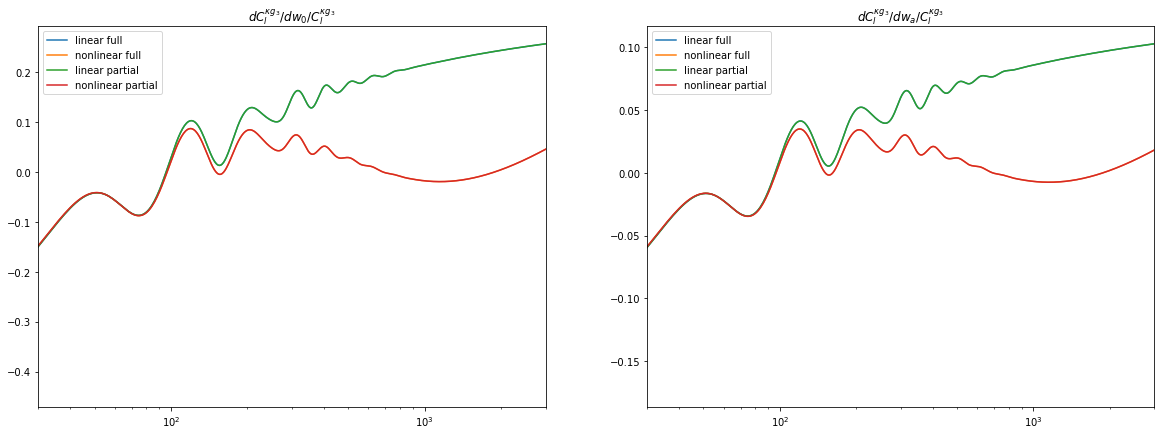

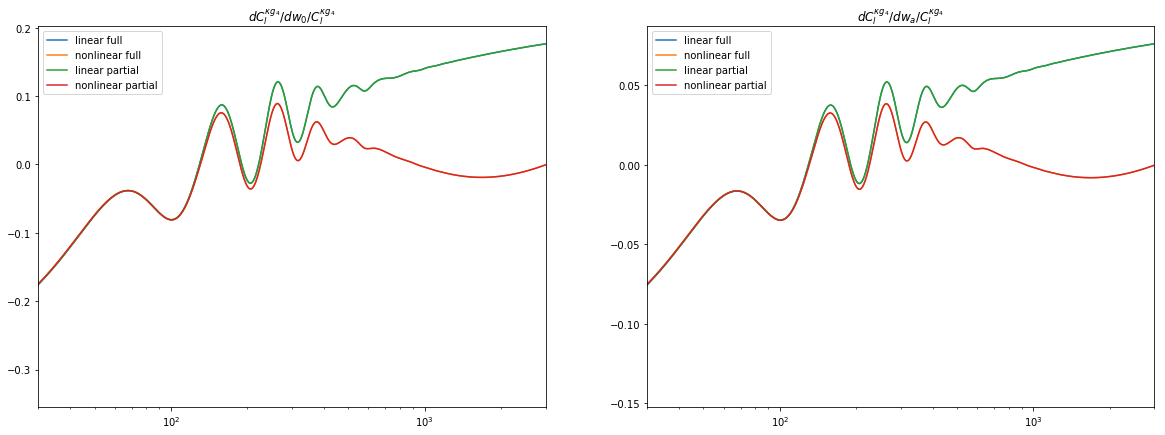

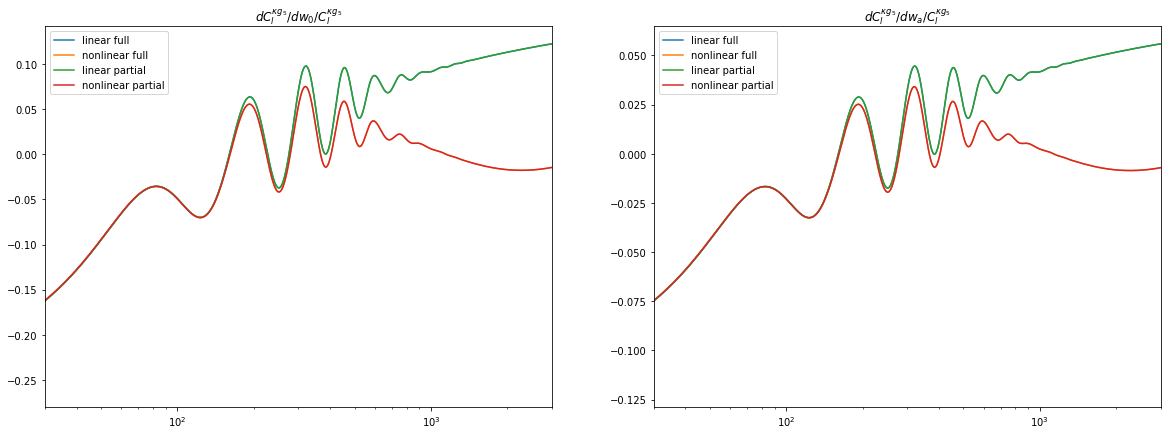

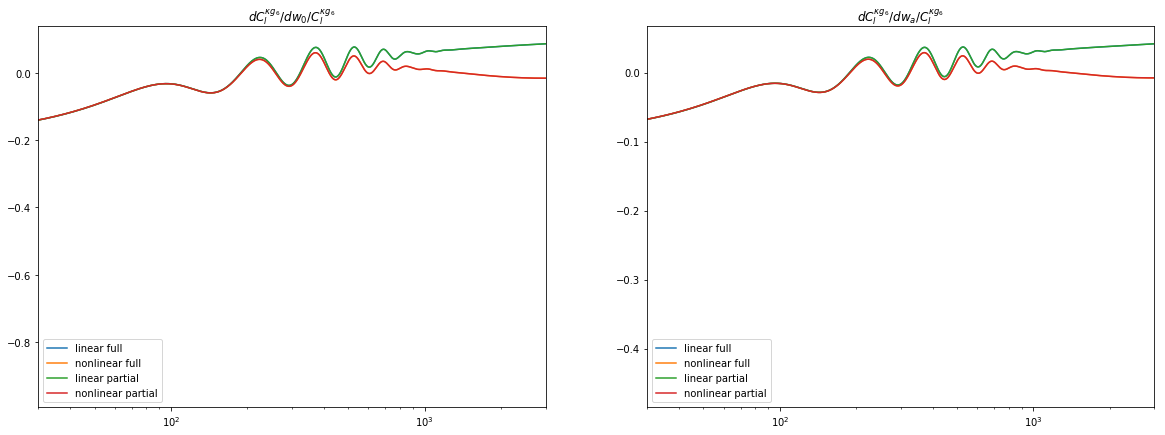

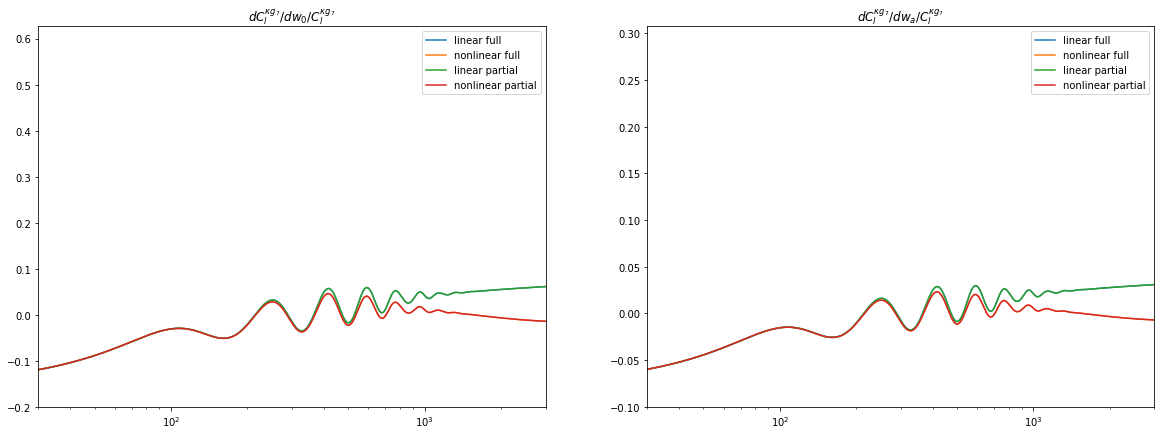

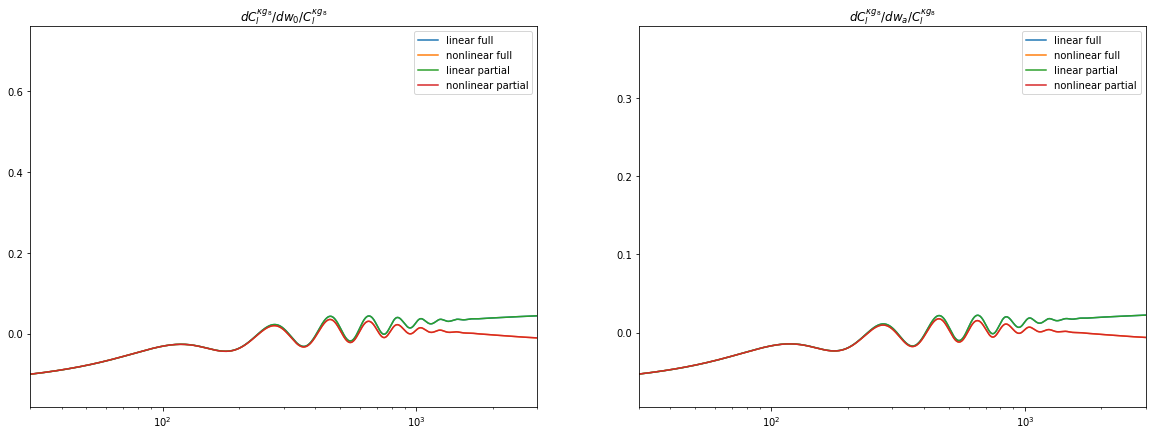

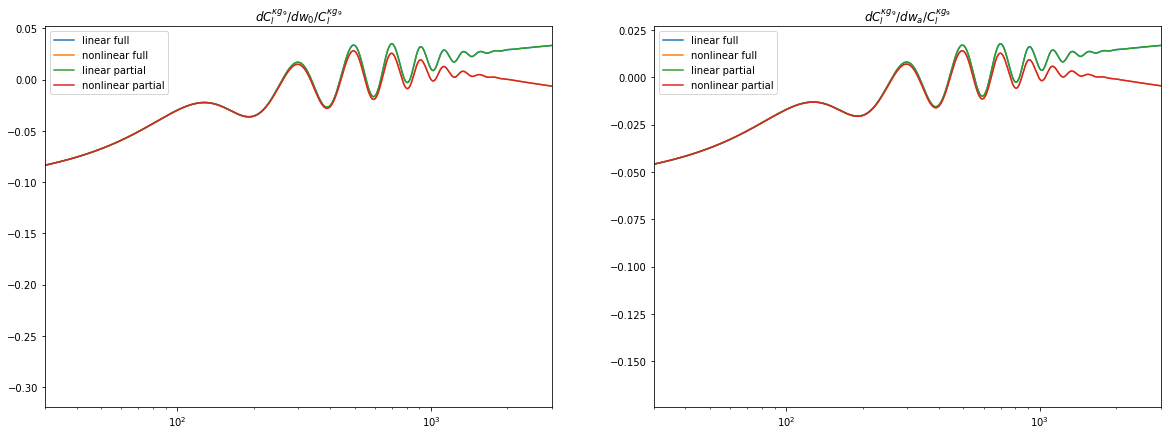

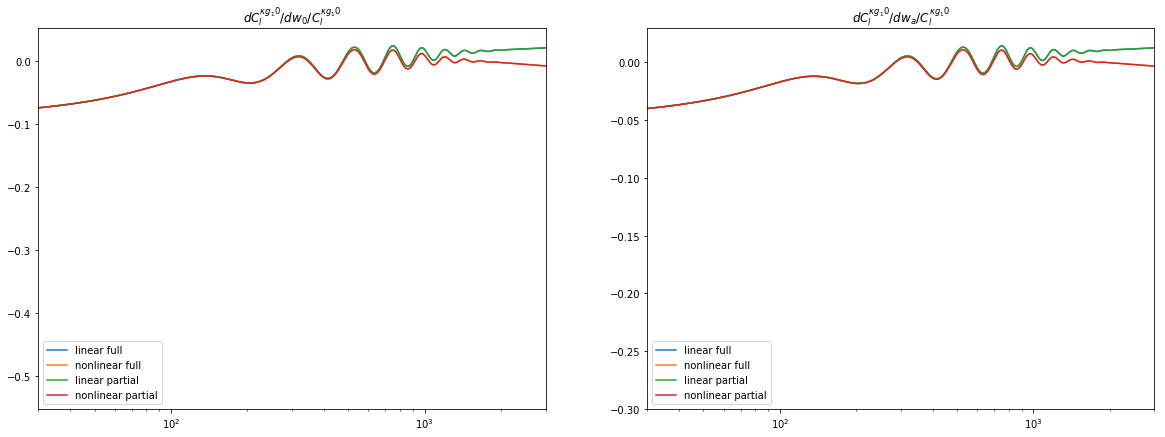

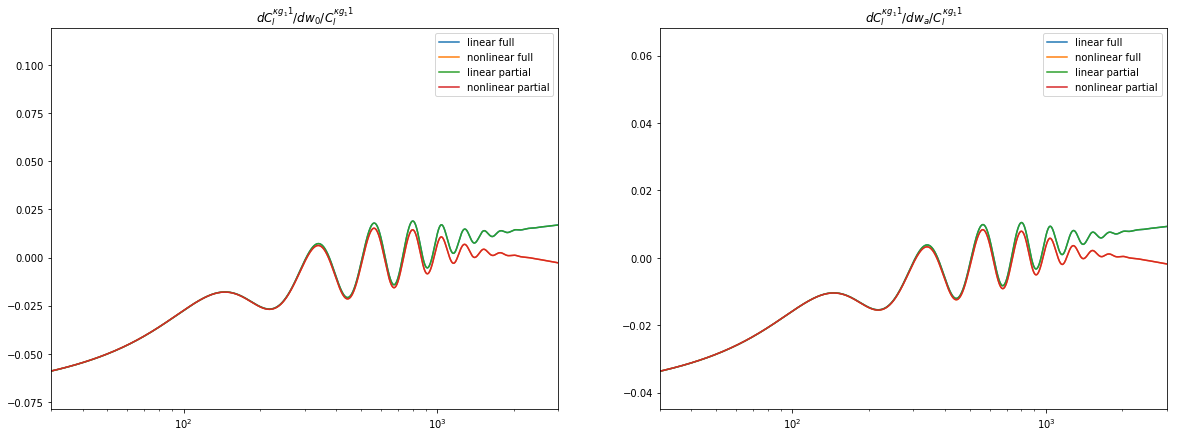

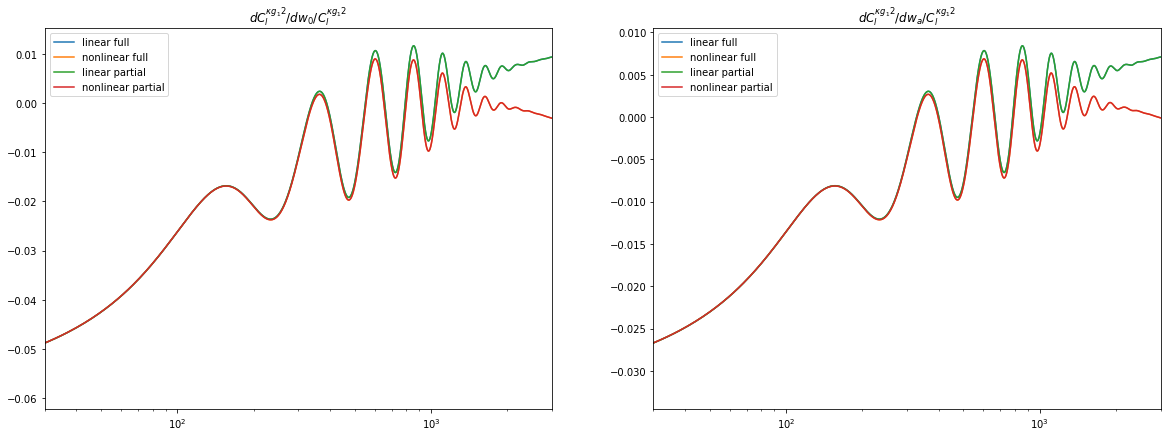

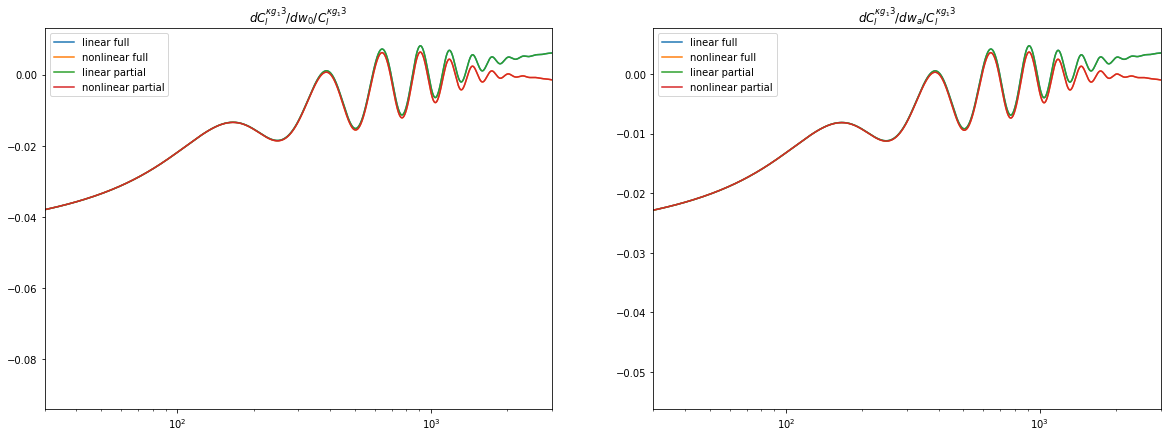

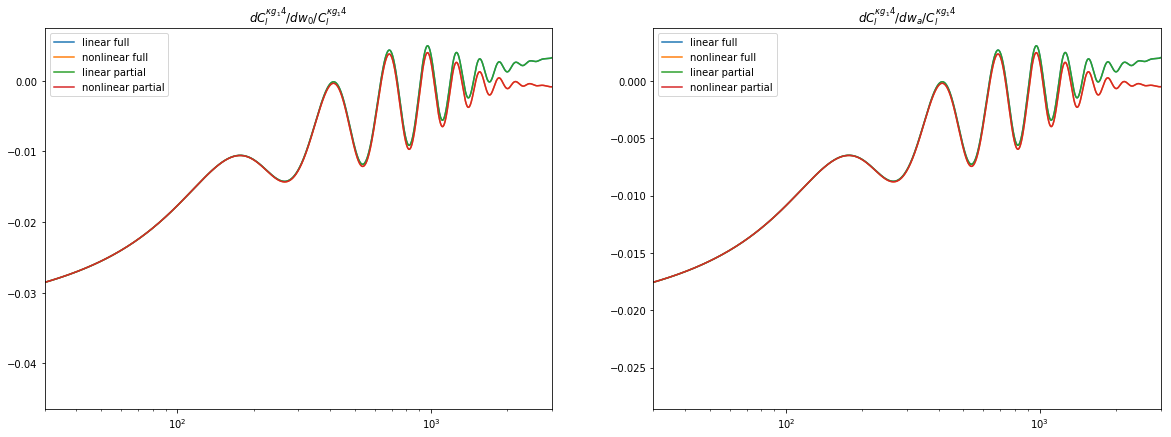

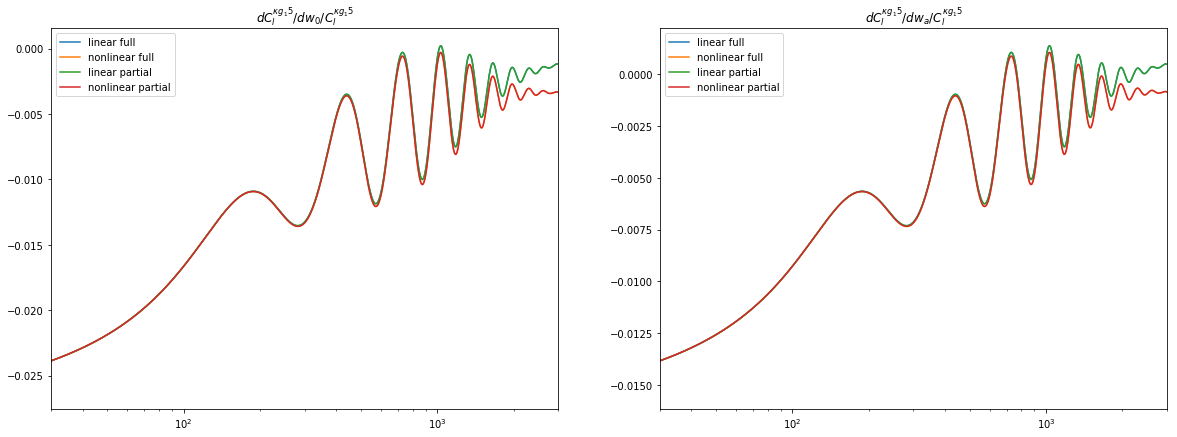

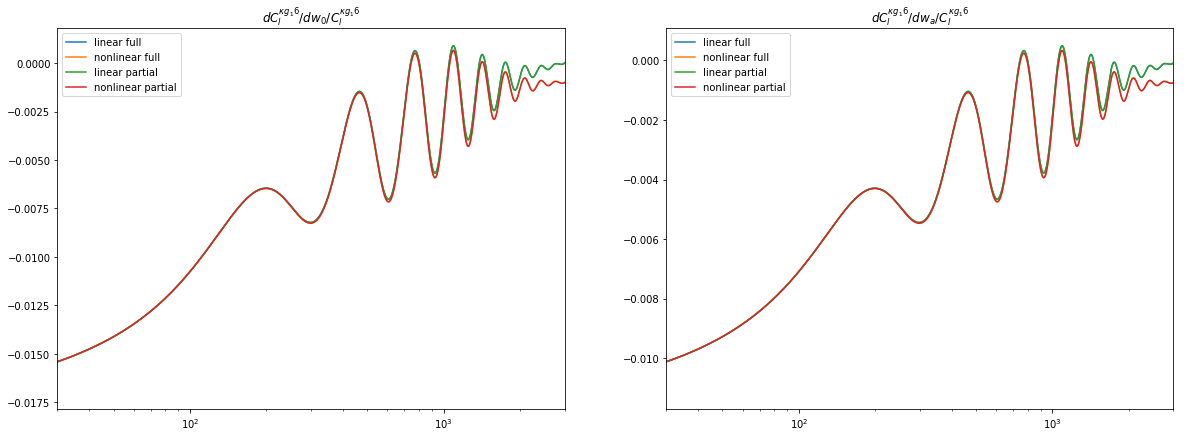

In [26]:
# same but dCl/dw /Cl
# look at some dCl/dw, dCl/dwa curves
w0Num = 7; waNum = 8
for specNum in range(nToPlot):
    fig = plt.figure(figsize=(20, 7))
    
    plt.subplot(1, 2, 1)
    plt.semilogx(ells,Fobj2.dClVecs[specNum,w0Num]/Fobj2.crossCls[0,specNum],label='linear full')
    plt.semilogx(ells,Fobj4.dClVecs[specNum,w0Num]/Fobj4.crossCls[0,specNum],label='nonlinear full')
    plt.semilogx(ells,dClVecs2[specNum,w0Num]/Fobj2.crossCls[0,specNum],label='linear partial')
    plt.semilogx(ells,dClVecs4[specNum,w0Num]/Fobj4.crossCls[0,specNum],label='nonlinear partial')
    plt.legend()
    plt.title(r'$dC_l^{{\kappa g_{0} }}/dw_0 / C_l^{{\kappa g_{0} }}$'.format(specNum))
    plt.xlim([30,3000])
    #plt.show()
    
    plt.subplot(1, 2, 2)
    plt.semilogx(ells,Fobj2.dClVecs[specNum,waNum]/Fobj2.crossCls[0,specNum],label='linear full')
    plt.semilogx(ells,Fobj4.dClVecs[specNum,waNum]/Fobj4.crossCls[0,specNum],label='nonlinear full')
    plt.semilogx(ells,dClVecs2[specNum,waNum]/Fobj2.crossCls[0,specNum],label='linear partial')
    plt.semilogx(ells,dClVecs4[specNum,waNum]/Fobj4.crossCls[0,specNum],label='nonlinear partial')
    plt.legend()
    plt.title(r'$dC_l^{{\kappa g_{0} }}/dw_a / C_l^{{\kappa g_{0} }}$'.format(specNum))
    plt.xlim([30,3000])
    plt.show()
    

# Insert into Fisher matrix objects and save: pzk varies, chi fixed

In [52]:
def getSigmas(Fij):
    return np.sqrt(np.diag(np.linalg.inv(Fij)))

In [53]:
# Insert new quantities into Fobjs and get new sigmas
Fobj2.dClVecs = np.copy(dClVecs2_k1)
Fobj4.dClVecs = np.copy(dClVecs4_k1)

Fobj2.Fij = Fobj2.makeFisher(30)
Fobj4.Fij = Fobj4.makeFisher(30)

Fij2_k1 = np.copy(Fobj2.Fij)
Fij4_k1 = np.copy(Fobj4.Fij)

#sigmas_kg2_k1_new = getSigmas(Fobj2.Fij)
#sigmas_kg4_k1_new = getSigmas(Fobj4.Fij)
print 'done.'


done.


In [54]:
# Save the modified Fisher Objects

#filehandler_lin = open('Fisher_7_16O_dP4_k1.obj','w') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,
#filehandler_nln = open('Fisher_7_16M_dP4_k1.obj','w') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#filehandler_lin = open('Fisher_7_16O_dP4_bothk1.obj','w') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,
#filehandler_nln = open('Fisher_7_16M_dP4_bothk1.obj','w') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,

if amponly:
    filehandler_lin = open('Fisher_7_16O_wa1_amponly_k1.obj','w') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,
    filehandler_nln = open('Fisher_7_16M_wa1_amponly_k1.obj','w') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
else:
    filehandler_lin = open('Fisher_7_16O_wa1_both_k1.obj','w') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,
    filehandler_nln = open('Fisher_7_16M_wa1_both_k1.obj','w') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,


pickle.dump(Fobj2,filehandler_lin)
pickle.dump(Fobj4,filehandler_nln)
filehandler_lin.close()
filehandler_nln.close()
print 'done.'


done.


In [55]:
# Insert new quantities into Fobjs and get new sigmas
Fobj2.dClVecs = np.copy(dClVecs2_k2)
Fobj4.dClVecs = np.copy(dClVecs4_k2)

Fobj2.Fij = Fobj2.makeFisher(30)
Fobj4.Fij = Fobj4.makeFisher(30)

Fij2_k2 = np.copy(Fobj2.Fij)
Fij4_k2 = np.copy(Fobj4.Fij)

#sigmas_kg2_k2_new = getSigmas(Fobj2.Fij)
#sigmas_kg4_k2_new = getSigmas(Fobj4.Fij)
print 'done.'


done.


In [56]:
# Save the modified Fisher Objects

#filehandler_lin = open('Fisher_7_16O_dP4_k2.obj','w') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,
#filehandler_nln = open('Fisher_7_16M_dP4_k2.obj','w') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#filehandler_lin = open('Fisher_7_16O_dP4_bothk2.obj','w') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,
#filehandler_nln = open('Fisher_7_16M_dP4_bothk2.obj','w') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,

if amponly:
    filehandler_lin = open('Fisher_7_16O_wa1_amponly_k2.obj','w') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,
    filehandler_nln = open('Fisher_7_16M_wa1_amponly_k2.obj','w') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
else:
    filehandler_lin = open('Fisher_7_16O_wa1_both_k2.obj','w') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,
    filehandler_nln = open('Fisher_7_16M_wa1_both_k2.obj','w') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,

pickle.dump(Fobj2,filehandler_lin)
pickle.dump(Fobj4,filehandler_nln)
filehandler_lin.close()
filehandler_nln.close()
print 'done.'


done.


# create $P(z,k)$ functions with z-shape removed, by bin

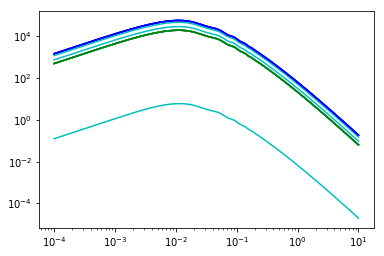

In [8]:
# create p(z,k) functions with z-shape removed, by bin.
# this will be used inside getCrossCls based on the myPk that is passed into it.
import copy
from scipy.interpolate import RectBivariateSpline

def getMedianPk(myPk,binNum):
    """
    Inputs:
      myPk: a matterPower object
      binNum: which bin number (0-16) to use median of; 0 is for kappa-kappa
    Returns:
      a modified matterPower object which has its PK.P interpolator set to the median z value of the selected bin
    """
    binEdges = np.array([0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.3, 2.6, 3.0, 3.5, 4.0, 7.0, 1089.6])
    # medians are just averages
    binCenters = (binEdges[1:]+binEdges[:-1])/2.
    #print binCenters
    
    modPk = copy.deepcopy(myPk)  
    myZ = binCenters[binNum]
    if binNum == 0: #kappa
        myZ = 2 #near the peak of the window function
    
    kArray = np.logspace(-4,1,10000) #10000 points
    uniformPk = myPk.PK.P(myZ,kArray)
    #print uniformPk.shape
    
    zArray = np.array([0,100,1000,1100])
    pzkSurface = np.reshape(np.array([uniformPk,uniformPk,uniformPk,uniformPk]),(4,10000))
    #print zArray.shape,kArray.shape,pzkSurface.shape
    
    myInterp = RectBivariateSpline(zArray,kArray,pzkSurface)
    modPk.PK.P = myInterp
    
    return modPk


# test it
testPk1 = getMedianPk(myPk2,1)
testPk7 = getMedianPk(myPk2,7)

testZs = [0.5,1,1.5,150]
kArray = np.logspace(-4,1,10000) #10000 points
for testZ in testZs:
    plt.loglog(kArray,testPk1.PK.P(testZ,kArray,grid=False),color='b')
    plt.loglog(kArray,testPk7.PK.P(testZ,kArray,grid=False),color='g')
    plt.loglog(kArray,  myPk2.PK.P(testZ,kArray,grid=False),color='c')
plt.show()



In [ ]:
# I may not need the rest of this.  It's not getting used in the paper.

# Create w-derivatives that vary both chi and pzk
This method involves $P(k,z;w_{fid})\times g(\Delta w)$

In [9]:
# load data needed for P(z,k) scaling
#myZs, myKs, dPdw0_ratio = np.load('dPdw0_ratio.npy')
#myZs, myKs, dPdwa_ratio = np.load('dPdwa_ratio.npy')
#myZs, myKs, dPdw0_ratio = np.load('dPdw0_avg_ex.npy')
#myZs, myKs, dPdwa_ratio = np.load('dPdwa_avg_ex.npy')
#myZs, myKs, dPdw0_ratio = np.load('dw0_avg_ex.npy')
#myZs, myKs, dPdwa_ratio = np.load('dwa_avg_ex.npy')
myZs, myKs, dPdw0_ratio = np.load('g_0_ex.npy')
myZs, myKs, dPdwa_ratio = np.load('g_a_ex.npy')
#myZs, myKs, dPdw0_ratio = np.load('dPdw0_ex.npy')
#myZs, myKs, dPdwa_ratio = np.load('dPdwa_ex.npy')
print 'done.'

done.


In [10]:
# create interpolation functions for them
from scipy.interpolate import RectBivariateSpline
g_0_interp_raw = RectBivariateSpline(myZs,myKs,dPdw0_ratio)
g_a_interp_raw = RectBivariateSpline(myZs,myKs,dPdwa_ratio)

print 'done.'

done.


In [11]:
# turn it into a version flattened in the z-direction
doFlat = True

# bin centers
binEdges = np.array([0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.3, 2.6, 3.0, 3.5, 4.0, 7.0, 1089.6])
# medians are just averages
binCenters = (binEdges[1:]+binEdges[:-1])/2.

if doFlat:
    """
    nCenters = binCenters.size
    # get extrapolations at bin centers
    Pmedians_g_0 = []
    Pmedians_g_a = []
    for cent in binCenters:
        Pmedians_g_0.append(g_0_interp_raw(cent,myKs))
        Pmedians_g_a.append(g_a_interp_raw(cent,myKs))
        
    # add bin endpoints into myZs if not there already
    insertIndex = 0
    for edge in binEdges:
        while myZs[insertIndex]<=edge: insertIndex +=1
        # add bin endpoints into array if not there already
        if myZs[insertIndex-1] != edge:
            myZs = np.insert(myZs,insertIndex,edge)
    #print myZs
    """
    
    
    def g_0_interp(zArray,kArray,grid=False):
        """
        Inputs:
            zArray,kArray: the z,k paired points to evaluate at.
                must be same length numpy arrays
            grid=False: placeholder to match the form of g_0_interp
                grid will always be False in this function
        Returns:
            g_0 evaluated at bin center, kvalue for each pair z,k
        """
        nPairs = zArray.size
        toReturn = []
        for pairNum in range(nPairs):
            # find edge higher than z point
            edgeIndex = 0
            while zArray[pairNum] > binEdges[edgeIndex]:
                edgeIndex += 1
            #print 'pairNum = ',pairNum, ', zArray[pairNum] = ',zArray[pairNum],', edgeIndex = ',edgeIndex,', binEdges[edgeIndex] = ',binEdges[edgeIndex]
            # evaluate the interp function at the bin center
            toReturn.append(g_0_interp_raw(binCenters[edgeIndex-1],kArray[pairNum],grid=False))
        return np.array(toReturn)
            
    # copy that for g_a
    def g_a_interp(zArray,kArray,grid=False):
        """
        Inputs:
            zArray,kArray: the z,k paired points to evaluate at.
                must be same length numpy arrays
            grid=False: placeholder to match the form of g_a_interp
                grid will always be False in this function
        Returns:
            g_a evaluated at bin center, kvalue for each pair z,k
        """
        nPairs = zArray.size
        toReturn = []
        for pairNum in range(nPairs):
            # find edge higher than z point
            edgeIndex = 0
            while zArray[pairNum] > binEdges[edgeIndex]:
                edgeIndex += 1
            # evaluate the interp function at the bin center
            toReturn.append(g_a_interp_raw(binCenters[edgeIndex-1],kArray[pairNum],grid=False))
        return np.array(toReturn)
    
else: 
    g_0_interp = g_0_interp_raw
    g_a_interp = g_a_interp_raw
    
print 'ok'

ok


In [12]:
# prepare some tests for plotting
nZs=1000; nKs=1000
plotKs = np.logspace(-6,1,nKs)
plotZs = np.linspace(0,7,nZs)
zz,kk = np.meshgrid(plotZs,plotKs)
#print zz.shape, kk.shape
#print zz.size, kk.size
test_g_0 = []
test_g_a = []
for kNum in range(nKs):
    test_g_0.append(g_0_interp(zz[kNum],kk[kNum]))
    test_g_a.append(g_a_interp(zz[kNum],kk[kNum]))

t_g_0 = np.array(test_g_0)
t_g_a = np.array(test_g_a)
print t_g_0.shape,t_g_a.shape
print 'done.'

(1000, 1000) (1000, 1000)
done.


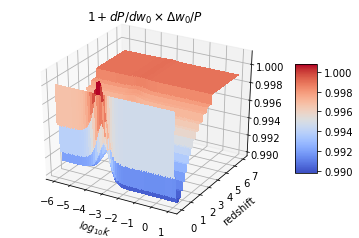

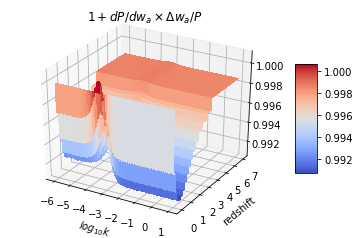

In [13]:
# plot 'em up
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

zIndLow = 0
zIndLim = 30 #highest z index to plot +1

fig = plt.figure()
ax = fig.gca(projection='3d')
#toPlot = t_g_0.copy()
#toPlot = toPlot[zIndLow:zIndLim]
#print toPlot.shape

#X, Y = np.meshgrid(np.log10(myKs),myZs[zIndLow:zIndLim])
#PP = toPlot#.reshape(X.shape)
#print Z.shape
surf = ax.plot_surface(np.log10(kk),zz,t_g_0,
                cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.set_xlabel(r'$log_{10} k$')
ax.set_ylabel('redshift')
#ax.set_zlabel('dP/dw0/P')
ax.set_title(r'$1+dP/dw_0 \times \Delta w_0/P$')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()



fig = plt.figure()
ax = fig.gca(projection='3d')
#toPlot = t_g_a
#toPlot = toPlot[zIndLow:zIndLim]
#print toPlot.shape

#X, Y = np.meshgrid(np.log10(myKs),myZs[zIndLow:zIndLim])
#PP = toPlot#.reshape(X.shape)
#print Z.shape
surf = ax.plot_surface(np.log10(kk),zz,t_g_a,
                cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.set_xlabel(r'$log_{10} k$')
ax.set_ylabel('redshift')
#ax.set_zlabel('dP/dwa/P')
ax.set_title(r'$1+dP/dw_a \times \Delta w_a/P$')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()








In [14]:
# create local versions of getCl, getCrossCls that forces dP/dw to be constant
# allow option to fix P(k,z) or chi

from scipy.interpolate import UnivariateSpline

def getCl(myPk,myPk2,myWin,binNum1=0,binNum2=0,cor1=cp.Window.kappa,cor2=cp.Window.kappa,
          lmin=2,lmax=2500,useInterp=True,pName='paramName',plus=True,minus=False):
  """
    Purpose: get angular power spectrum
    Inputs:
      myPk: a MatterPower object; the one for chi(z)
      myPk2: the one that P(k,z) is taken from
      myWin: a Window object that was made with the same MatterPower object (myPk)
      binNum1,binNum2: index indicating which bin to use
        If myWin.dndzMode = 1:
          integer in {0,1,2,3,4,5}
          curves from fig.3 of Crocce et al 2016.
        if myWin.dndzMode = 2:
          integer in {0,1,...,nBins-1,nBins}
        Index=0 indicates sum of all other curves
      cor1,cor2: the names of the two fields to cross-correlate
        must be Window.kappa or Window.galaxies
        Default: Window.kappa
      lmin,lmax: lowest,highest ell to return.
      useInterp: set to true to only do some ell values, and interpolate
        the rest
        Default: True
    Modification:
      Modified to take two input MatterPower objects, and use one for chi(z), the other for P(k,z); ZK, 2018.07.26
    Returns: 
      ell,  the ell values (same length as Cl array)
      Cl, the power spectrum array
  """

  # confirm inputs
  def wincheck(winfunc,num):
    if winfunc == cp.Window.kappa:
      if num == 1:
        print 'window ',num,': kappa ',binNum1
      else:
        print 'window ',num,': kappa ',binNum2
    elif winfunc == cp.Window.galaxies:
      if num == 1:
        print 'window ',num,': galaxies ',binNum1
      else:
        print 'window ',num,': galaxies ',binNum2
    else:
      print 'error with input'
      return 0
    return 1
  
  if wincheck(cor1,1)==0: return 0,0
  if wincheck(cor2,2)==0: return 0,0
  
  # get matter power spectrum P_k^delta
  PK,chistar,chis,dchis,zs,dzs,pars = myPk.getPKinterp()
  PK2,chistar2,chis2,dchis2,zs2,dzs2,pars2 = myPk2.getPKinterp()
    
  # modify PK2 for constant dP/dw0 or constant dP/dwa
  """
  if pName == 'w':
    #deltaP = 0.05/2.
    #if minus == True:
    #    deltaP += -1
    #print 'delta w0 = ',deltaP
    #PKmod = lambda z, k : dPdw0_interp(z,k,grid=False)*PK2.P(z,k,grid=False) 
    #PKmod = lambda z, k : PK2.P(z,k,grid=False) + dPdw0_interp(z,k,grid=False)*deltaP
    if minus == True:
        PKmod = lambda z, k : PK2.P(z,k,grid=False)*(2-g_0_interp(z,k,grid=False))
    if plus == True:
        PKmod = lambda z, k : PK2.P(z,k,grid=False)*g_0_interp(z,k,grid=False)
  elif pName == 'wa':
    #deltaP = 0.025/2.
    #if minus == True:
    #    deltaP += -1
    #print 'delta wa = ',deltaP
    #PKmod = lambda z, k : dPdwa_interp(z,k,grid=False)*PK2.P(z,k,grid=False)
    #PKmod = lambda z, k : PK2.P(z,k,grid=False) + dPdwa_interp(z,k,grid=False)*deltaP
    if minus == True:
        PKmod = lambda z, k : PK2.P(z,k,grid=False)*(2-g_a_interp(z,k,grid=False))
    if plus == True:
        PKmod = lambda z, k : PK2.P(z,k,grid=False)*g_a_interp(z,k,grid=False)
  else:
    PKmod = lambda z, k : PK2.P(z,k,grid=False)
  """
  PKmod = lambda z, k : PK2.P(z,k,grid=False) # for pzk to vary according to PK2 only; no mult.factor
    
  # cut off zs, chis, dchis above top of zs2
  while zs[-1] > zs2[-1]:
        zs = np.delete(zs,-1)
        chis = np.delete(chis,-1)
        dchis = np.delete(dchis,-1)

  # get window functions
  winFunc1=cor1(myWin,binNum1)
  winFunc2=cor2(myWin,binNum2)
  win1 = winFunc1(zs)
  win2 = winFunc2(zs)

  #Do integral over chi
  if useInterp and lmax <= 3000:
    # define ell values to be used 
    #   (same used in notebook "getCl interpolation testing")
    ells1 = np.arange(10)*2+10
    ells2 = np.arange(4)*5+30
    ells3 = np.arange(5)*10+50
    ells4 = np.arange(20)*25+100
    ells5 = np.arange(20)*70+600
    ells6 = np.arange(11)*100+2000 # switch 11 to 31 to extend from 3000 to 5000
    ellsSet = np.append(ells1,np.append(ells2,np.append(ells3,
        np.append(ells4,np.append(ells5,ells6)))))
    #print 'ell set: ',ellsSet
  else:
    if lmax > 3000:
        print 'warning! lmax>3000 found; Cl interpolation not being done.'
    ellsSet = np.arange(lmin,lmax+1, dtype=np.float64)

  Cells = np.zeros(ellsSet.shape)
  w = np.ones(chis.shape) #this is just used to set to zero k values out of range
  for i, l in enumerate(ellsSet):
    k=(l+0.5)/chis
    w[:]=1
    w[k<1e-4]=0
    w[k>=myPk.kmax]=0
    #Cells[i] = np.dot(dchis, w*PK.P(zs, k, grid=False)*win1*win2/(chis**2)) # this one for unmodified derivatives
    Cells[i] = np.dot(dchis, w*PKmod(zs, k)*win1*win2/(chis**2))

  if useInterp:
    ls = np.arange(lmin,lmax+1, dtype=np.float64)
    y_spl = UnivariateSpline(ellsSet,Cells,s=0,k=4)
    cl = y_spl(ls)   
  else:
    ls = ellsSet
    cl = Cells

  return ls, cl


def getCrossCls(paramList,myParams,myPk,lmin,lmax,nBins,Fobj,tophatBins=True,plus=False,minus=False,doMedian=True):
    """
        Purpose:
            get the crossCls for kappa, galaxies
        Inputs:
            paramList: like FisherMatrix.paramList, but only contains parameter
                names for those which are to be varied
                Note: a list of length 1 will cause a differently shaped array 
                to be returned
            myParams: a list of lists of parameters like FisherMatrix.cosParams
                This list must have the same length as paramList
            myPk: a MatterPower object

            nBins: number of redshift bins being used (should be nMaps-1)
            lmin,lmax: min,max ell value to use
            Fobj: contains various settings to copy
            tophatBins: set to True to use tophat-shaped, non-overlapping bins
            plus,minus: set one or none to True to indicate upper/lower part for derivative
                Default: both False
            doMedian: set to True to use bin median P(z=median,k) instead of allowing evolution over bin
                Default: True
        Modification:
            Pulled out of FisherCl.FisherMatrix; modified to use two cp.MatterPower objects; 
                Added Fobj to parameter list since not part of an object anymore; ZK,2018.07.26
        Returns:
            crossCls: numpy array of shape (nMaps,nMaps,nCosParams,lmax)
              unless the lenth of paramList is 1, then shape will be 
              (nMaps,nMaps,lmax)
    """
    nCosParams = paramList.__len__()
    nMaps = nBins+1

    crossCls = np.zeros((nMaps,nMaps,nCosParams,lmax-lmin+1))
    for cParamNum in range(nCosParams):
        print 'calculating MatterPower and Window objects for ',\
              paramList[cParamNum], ' derivative . . . '

        myPks = cp.MatterPower(nz=Fobj.nz,AccuracyBoost=Fobj.AccuracyBoost,
                               nonlinear=Fobj.nonlinear,**myParams[cParamNum])
        # myWins should use the MatterPower object that goes into the first position in getCl
        #myWins = cp.Window(myPk,zmin=Fobj.zmin,zmax=Fobj.zmax,
        myWins = cp.Window(myPks,zmin=Fobj.zmin,zmax=Fobj.zmax, 
                           nBins=Fobj.nBins,biasK=cp.ones,biasG=cp.byeBias,
                           dndzMode=Fobj.dndzMode,z0=Fobj.z0,doNorm=Fobj.doNorm,
                           useWk=Fobj.useWk,BPZ=Fobj.BPZ,
                           binSmooth=Fobj.binSmooth,biasByBin=Fobj.biasByBin)

        # save pars for use in primary CMB
        # it would be nice to restore this functionality 
        #  but global DE settings make this hard
        #myParsUpper.append(myPksUpper.pars)
        #myParsLower.append(myPksLower.pars)

        for map1 in range(nMaps):
          if map1==0:
            cor1 = cp.Window.kappa
          else:
            cor1 = cp.Window.galaxies
          for map2 in range(map1,nMaps):
            print '  starting angular cross power spectrum ',map1,', ',map2,'... '
            if map2==0:
              cor2 = cp.Window.kappa
            else:
              cor2 = cp.Window.galaxies
            # since nonoverlapping bins have zero correlation use this condition:
            if map1==0 or map1==map2 or not tophatBins:
              #ells,Cls = cp.getCl(myPks,myWins,binNum1=map1,binNum2=map2,
              #                    cor1=cor1,cor2=cor2,lmin=lmin,lmax=lmax)
                
              # modified to use first Pk argument for chi(z), second for P(k)
              #ells,Cls = getCl(myPks,myPks,myWins,binNum1=map1,binNum2=map2, #kludge to vary both
              if doMedian and map2 != 0: #exclude the kk case
                myPksUse = getMedianPk(myPks,map2)
                myPkUse  = getMedianPk(myPk,map2)
              else:
                myPksUse = myPks
                myPkUse  = myPk
              # local myPks in first and second positions for "full" - no pkmod
              ells,Cls = getCl(myPksUse,myPksUse,myWins,binNum1=map1,binNum2=map2,  
                                  cor1=cor1,cor2=cor2,lmin=lmin,lmax=lmax,pName=paramList[cParamNum],
                               plus=plus,minus=minus)
              # local myPks in first position to vary chi (myWins should match myPks) "pzk fixed" - no pkmod
              #    For "shape fixed": use pkmod
              #ells,Cls = getCl(myPksUse,myPkUse,myWins,binNum1=map1,binNum2=map2,  
              #                    cor1=cor1,cor2=cor2,lmin=lmin,lmax=lmax,pName=paramList[cParamNum],
              #                 plus=plus,minus=minus)
              # local myPks in second position to vary pzk (myWins should match myPk) "chi fixed" - no pkmod
              #ells,Cls = getCl(myPkUse,myPksUse,myWins,binNum1=map1,binNum2=map2,
              #                    cor1=cor1,cor2=cor2,lmin=lmin,lmax=lmax,pName=paramList[cParamNum],
              #                 plus=plus,minus=minus)
              # local myPks not used; variation happens in crossCls using 2nd position "chiShape fixed" - also use pkmod
              #ells,Cls = getCl(myPkUse,myPkUse,myWins,binNum1=map1,binNum2=map2,
              #                    cor1=cor1,cor2=cor2,lmin=lmin,lmax=lmax,pName=paramList[cParamNum],
              #                 plus=plus,minus=minus)
              
              crossCls[map1,map2,cParamNum] = Cls
              crossCls[map2,map1,cParamNum] = Cls #symmetric

        # ditch the MatterPower and Window objects - wait, isn't this automatic?
        del myPks
        del myWins

    # reshape for unperterbed version
    if nCosParams == 1:
        crossCls = np.reshape(crossCls,(nMaps,nMaps,lmax-lmin+1))
    return crossCls



In [15]:
# get the perturbed versions
print 'starting upper spectra for numeric derivatives . . . '
crossClsPlus_ww2 = getCrossCls(paramList[7:9],myParamsUpper[7:9],
                                     myPk2,
                                     lmin,lmax,nBins,Fobj2,tophatBins=tophatBins,plus=True)    
print 'starting lower spectra for numeric derivatives . . . '
crossClsMinus_ww2 = getCrossCls(paramList[7:9],myParamsLower[7:9],
                                      myPk2,
                                      lmin,lmax,nBins,Fobj2,tophatBins=tophatBins,minus=True)

print 'done.'

starting upper spectra for numeric derivatives . . . 
calculating MatterPower and Window objects for  w  derivative . . . 
neutrino_hierarchy =  degenerate
starting makePkInterp.
finishing makePkInterp.
calculating window  0 ... 
normalizedDNDZ:  [0.00000000e+00 3.49324385e-05 6.98648770e-05 ... 6.69003972e-08
 6.68108424e-08 6.67212876e-08]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  0 , binBGs:  1.8999998602538521
calculating window  1 ... 
normalizedDNDZ:  [0.         0.00117393 0.00234785 ... 0.         0.         0.        ]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  1 , binBGs:  1.1458420962639153
calculating window  2 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  2 , binBGs:  1.313321494746786
calculating window  3 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGo

  starting angular cross power spectrum  4 ,  5 ... 
  starting angular cross power spectrum  4 ,  6 ... 
  starting angular cross power spectrum  4 ,  7 ... 
  starting angular cross power spectrum  4 ,  8 ... 
  starting angular cross power spectrum  4 ,  9 ... 
  starting angular cross power spectrum  4 ,  10 ... 
  starting angular cross power spectrum  4 ,  11 ... 
  starting angular cross power spectrum  4 ,  12 ... 
  starting angular cross power spectrum  4 ,  13 ... 
  starting angular cross power spectrum  4 ,  14 ... 
  starting angular cross power spectrum  4 ,  15 ... 
  starting angular cross power spectrum  4 ,  16 ... 
  starting angular cross power spectrum  5 ,  5 ... 
window  1 : galaxies  5
window  2 : galaxies  5
  starting angular cross power spectrum  5 ,  6 ... 
  starting angular cross power spectrum  5 ,  7 ... 
  starting angular cross power spectrum  5 ,  8 ... 
  starting angular cross power spectrum  5 ,  9 ... 
  starting angular cross power spectrum  5 ,

calculating MatterPower and Window objects for  wa  derivative . . . 
neutrino_hierarchy =  degenerate
starting makePkInterp.
finishing makePkInterp.
calculating window  0 ... 
normalizedDNDZ:  [0.00000000e+00 3.49324385e-05 6.98648770e-05 ... 6.69003972e-08
 6.68108424e-08 6.67212876e-08]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  0 , binBGs:  1.8999998602538521
calculating window  1 ... 
normalizedDNDZ:  [0.         0.00117393 0.00234785 ... 0.         0.         0.        ]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  1 , binBGs:  1.1458420962639153
calculating window  2 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  2 , binBGs:  1.313321494746786
calculating window  3 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9

  starting angular cross power spectrum  4 ,  5 ... 
  starting angular cross power spectrum  4 ,  6 ... 
  starting angular cross power spectrum  4 ,  7 ... 
  starting angular cross power spectrum  4 ,  8 ... 
  starting angular cross power spectrum  4 ,  9 ... 
  starting angular cross power spectrum  4 ,  10 ... 
  starting angular cross power spectrum  4 ,  11 ... 
  starting angular cross power spectrum  4 ,  12 ... 
  starting angular cross power spectrum  4 ,  13 ... 
  starting angular cross power spectrum  4 ,  14 ... 
  starting angular cross power spectrum  4 ,  15 ... 
  starting angular cross power spectrum  4 ,  16 ... 
  starting angular cross power spectrum  5 ,  5 ... 
window  1 : galaxies  5
window  2 : galaxies  5
  starting angular cross power spectrum  5 ,  6 ... 
  starting angular cross power spectrum  5 ,  7 ... 
  starting angular cross power spectrum  5 ,  8 ... 
  starting angular cross power spectrum  5 ,  9 ... 
  starting angular cross power spectrum  5 ,

starting lower spectra for numeric derivatives . . . 
calculating MatterPower and Window objects for  w  derivative . . . 
neutrino_hierarchy =  degenerate
starting makePkInterp.
finishing makePkInterp.
calculating window  0 ... 
normalizedDNDZ:  [0.00000000e+00 3.49324385e-05 6.98648770e-05 ... 6.69003972e-08
 6.68108424e-08 6.67212876e-08]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  0 , binBGs:  1.8999998602538521
calculating window  1 ... 
normalizedDNDZ:  [0.         0.00117393 0.00234785 ... 0.         0.         0.        ]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  1 , binBGs:  1.1458420962639153
calculating window  2 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  2 , binBGs:  1.313321494746786
calculating window  3 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGo

  starting angular cross power spectrum  4 ,  5 ... 
  starting angular cross power spectrum  4 ,  6 ... 
  starting angular cross power spectrum  4 ,  7 ... 
  starting angular cross power spectrum  4 ,  8 ... 
  starting angular cross power spectrum  4 ,  9 ... 
  starting angular cross power spectrum  4 ,  10 ... 
  starting angular cross power spectrum  4 ,  11 ... 
  starting angular cross power spectrum  4 ,  12 ... 
  starting angular cross power spectrum  4 ,  13 ... 
  starting angular cross power spectrum  4 ,  14 ... 
  starting angular cross power spectrum  4 ,  15 ... 
  starting angular cross power spectrum  4 ,  16 ... 
  starting angular cross power spectrum  5 ,  5 ... 
window  1 : galaxies  5
window  2 : galaxies  5
  starting angular cross power spectrum  5 ,  6 ... 
  starting angular cross power spectrum  5 ,  7 ... 
  starting angular cross power spectrum  5 ,  8 ... 
  starting angular cross power spectrum  5 ,  9 ... 
  starting angular cross power spectrum  5 ,

calculating MatterPower and Window objects for  wa  derivative . . . 
neutrino_hierarchy =  degenerate
starting makePkInterp.
finishing makePkInterp.
calculating window  0 ... 
normalizedDNDZ:  [0.00000000e+00 3.49324385e-05 6.98648770e-05 ... 6.69003972e-08
 6.68108424e-08 6.67212876e-08]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  0 , binBGs:  1.8999998602538521
calculating window  1 ... 
normalizedDNDZ:  [0.         0.00117393 0.00234785 ... 0.         0.         0.        ]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  1 , binBGs:  1.1458420962639153
calculating window  2 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  2 , binBGs:  1.313321494746786
calculating window  3 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9

  starting angular cross power spectrum  4 ,  5 ... 
  starting angular cross power spectrum  4 ,  6 ... 
  starting angular cross power spectrum  4 ,  7 ... 
  starting angular cross power spectrum  4 ,  8 ... 
  starting angular cross power spectrum  4 ,  9 ... 
  starting angular cross power spectrum  4 ,  10 ... 
  starting angular cross power spectrum  4 ,  11 ... 
  starting angular cross power spectrum  4 ,  12 ... 
  starting angular cross power spectrum  4 ,  13 ... 
  starting angular cross power spectrum  4 ,  14 ... 
  starting angular cross power spectrum  4 ,  15 ... 
  starting angular cross power spectrum  4 ,  16 ... 
  starting angular cross power spectrum  5 ,  5 ... 
window  1 : galaxies  5
window  2 : galaxies  5
  starting angular cross power spectrum  5 ,  6 ... 
  starting angular cross power spectrum  5 ,  7 ... 
  starting angular cross power spectrum  5 ,  8 ... 
  starting angular cross power spectrum  5 ,  9 ... 
  starting angular cross power spectrum  5 ,

In [ ]:
# set Halofit version
#print 'setting Halofit to Casarini (Halofit ver. 7)'
#camb.set_halofit_version('casarini')

print 'starting upper spectra for numeric derivatives . . . '
crossClsPlus_ww4 = getCrossCls(paramList[7:9],myParamsUpper[7:9],
                                     myPk4,
                                     lmin,lmax,nBins,Fobj4,tophatBins=tophatBins,plus=True)    
print 'starting lower spectra for numeric derivatives . . . '
crossClsMinus_ww4 = getCrossCls(paramList[7:9],myParamsLower[7:9],
                                      myPk4,
                                      lmin,lmax,nBins,Fobj4,tophatBins=tophatBins,minus=True)

print 'done.'

In [16]:
#print crossClsPlus2.shape,crossClsPlus4.shape
#print crossClsMinus2.shape,crossClsMinus4.shape
#print dClVecs2.shape, dClVecs4.shape

print crossClsPlus_ww2.shape#,crossClsPlus_ww4.shape
print crossClsMinus_ww2.shape#,crossClsMinus_ww4.shape

(17, 17, 2, 2999)
(17, 17, 2, 2999)


In [17]:
# grab some code from FisherCl
dClVecs2 = np.copy(Fobj2.dClVecs)
#dClVecs4 = np.copy(Fobj4.dClVecs)

# get derivatives wrt parameters
print 'starting creation of C_l derivatives... '

# get dC_l^munu/da_i (one vector of derivatives of C_ls for each param a_i)
# store as matrix with additional dimension for a_i)
# uses same (shortened) nCls as self.covar and self.obsList
nCls = nMaps*(nMaps+1)/2
#self.dClVecs = np.empty((nCls, self.nParams, lmax-lmin+1))
#Clzeros = np.zeros(lmax-lmin+1) # for putting into dClVecs when needed
for map1 in range(nMaps):
  print 'starting derivative set ',map1+1,' of ',nMaps,'... '
  for map2 in range(map1,nMaps):
    mapIdx  = map1*nMaps+map2 -map1*(map1+1)/2  
                               # mapIdx = map index
    # don't need dCl/db for this (omitted)
    
    # next do numerical derivs wrt nuLCDM params
    #for pIdx in range(nCosParams):
    for pIdx in range(7,9):
      dClPlus  = crossClsPlus_ww2[map1,map2,pIdx-7]
      dClMinus = crossClsMinus_ww2[map1,map2,pIdx-7]
      dClVecs2[mapIdx, pIdx] = (dClPlus-dClMinus)/(2*deltaP[pIdx])
      #dClPlus  = crossClsPlus_ww4[map1,map2,pIdx-7]
      #dClMinus = crossClsMinus_ww4[map1,map2,pIdx-7]
      #dClVecs4[mapIdx, pIdx] = (dClPlus-dClMinus)/(2*deltaP[pIdx])

print 'done.'

starting creation of C_l derivatives... 
starting derivative set  1  of  17 ... 
starting derivative set  2  of  17 ... 
starting derivative set  3  of  17 ... 
starting derivative set  4  of  17 ... 
starting derivative set  5  of  17 ... 
starting derivative set  6  of  17 ... 
starting derivative set  7  of  17 ... 
starting derivative set  8  of  17 ... 
starting derivative set  9  of  17 ... 
starting derivative set  10  of  17 ... 
starting derivative set  11  of  17 ... 
starting derivative set  12  of  17 ... 
starting derivative set  13  of  17 ... 
starting derivative set  14  of  17 ... 
starting derivative set  15  of  17 ... 
starting derivative set  16  of  17 ... 
starting derivative set  17  of  17 ... 
done.


In [18]:
# Insert new quantities into Fobjs and get new sigmas
def getSigmas(Fij):
    return np.sqrt(np.diag(np.linalg.inv(Fij)))

Fobj2.crossClsPlus[:,:,7:9] = np.copy(crossClsPlus_ww2)
Fobj2.crossClsMinus[:,:,7:9] = np.copy(crossClsMinus_ww2)
Fobj2.dClVecs = np.copy(dClVecs2)

#Fobj4.crossClsPlus = np.copy(crossClsPlus_ww4)
#Fobj4.crossClsMinus = np.copy(crossClsMinus_ww4)
#Fobj4.dClVecs = np.copy(dClVecs4)

Fobj2.Fij = Fobj2.makeFisher(30)
#Fobj4.Fij = Fobj4.makeFisher(30)

Fij2_both = np.copy(Fobj2.Fij)
#Fij4_both = np.copy(Fobj4.Fij)

sigmas_kg2_both_new = getSigmas(Fobj2.Fij)
#sigmas_kg4_both_new = getSigmas(Fobj4.Fij)
print 'done.'


done.


In [19]:
# Save the modified Fisher Objects

#filehandler_lin = open('Fisher_7_16O_dP4_both.obj','w') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,
#filehandler_nln = open('Fisher_7_16M_dP4_both.obj','w') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#filehandler_lin = open('Fisher_7_16O_wa1_median_B.obj','w') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,
#filehandler_nln = open('Fisher_7_16M_wa1_median_B.obj','w') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#filehandler_lin = open('Fisher_7_16O_wa1_median_shapeless_B.obj','w') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,
#filehandler_nln = open('Fisher_7_16M_wa1_median_shapeless_B.obj','w') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#filehandler_lin = open('Fisher_7_16O_wa1_median_pzkfixed_B.obj','w') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,
#filehandler_nln = open('Fisher_7_16M_wa1_median_pzkfixed_B.obj','w') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#filehandler_lin = open('Fisher_7_16O_wa1_median_chifixed_B.obj','w') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,
#filehandler_nln = open('Fisher_7_16M_wa1_median_chifixed_B.obj','w') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#filehandler_lin = open('Fisher_7_16O_wa1_median_chiShapefixed_B.obj','w') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,
#filehandler_nln = open('Fisher_7_16M_wa1_median_chiShapefixed_B.obj','w') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,


# again with the just picking the one I want
#filehandler_lin = open('Fisher_7_16Ln0_wa1_median.obj','w') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#filehandler_lin = open('Fisher_7_16M_wa1_median.obj','w') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#filehandler_lin = open('Fisher_7_16N_wa1_median.obj','w') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
filehandler_lin = open('Fisher_7_16O_wa1_median.obj','w') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,


pickle.dump(Fobj2,filehandler_lin)
#pickle.dump(Fobj4,filehandler_nln)
filehandler_lin.close()
#filehandler_nln.close()
print 'done.'


done.


# Compare old and new derivative versions

In [42]:
nToPlot = 17 # kk and kg at beginning of array

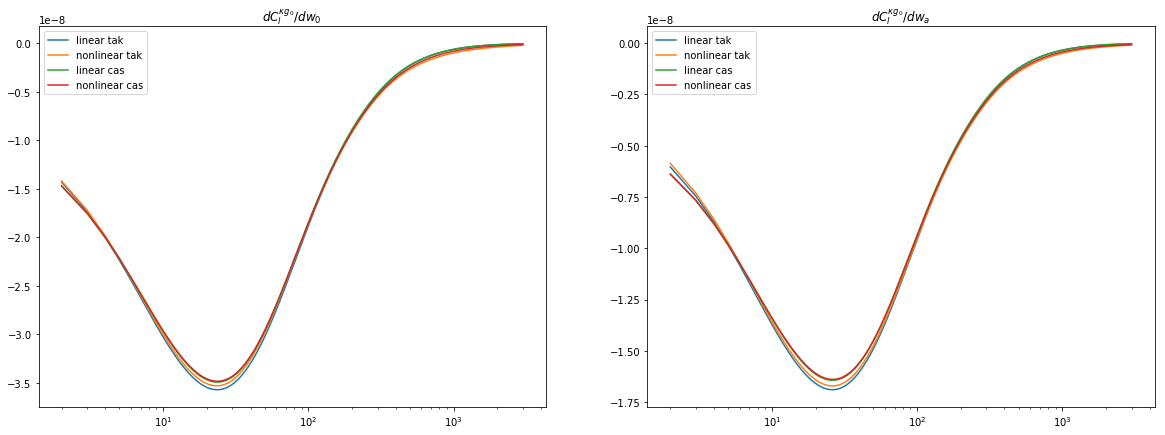

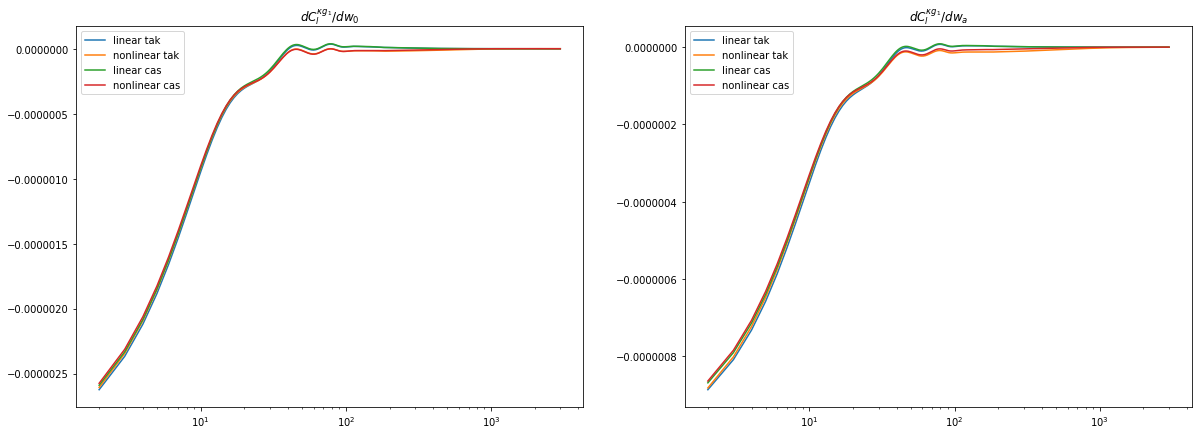

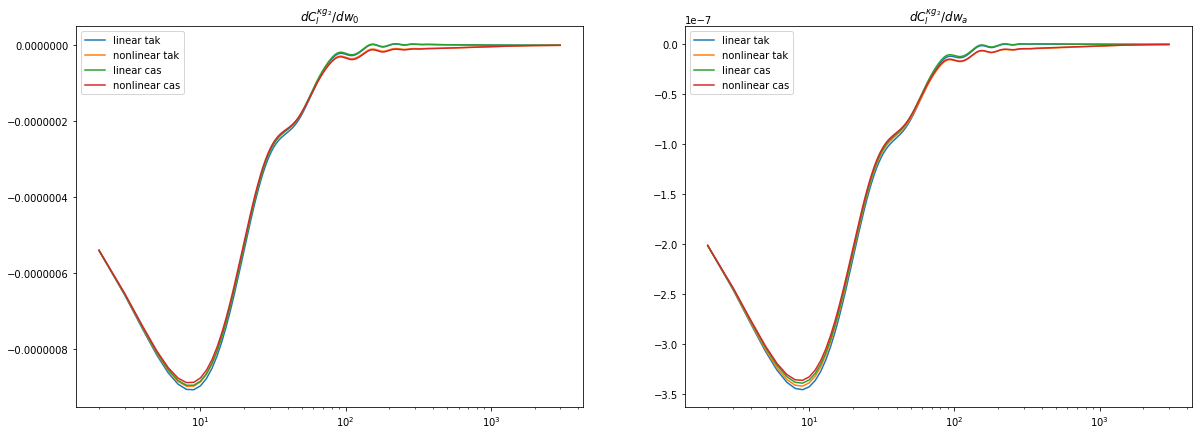

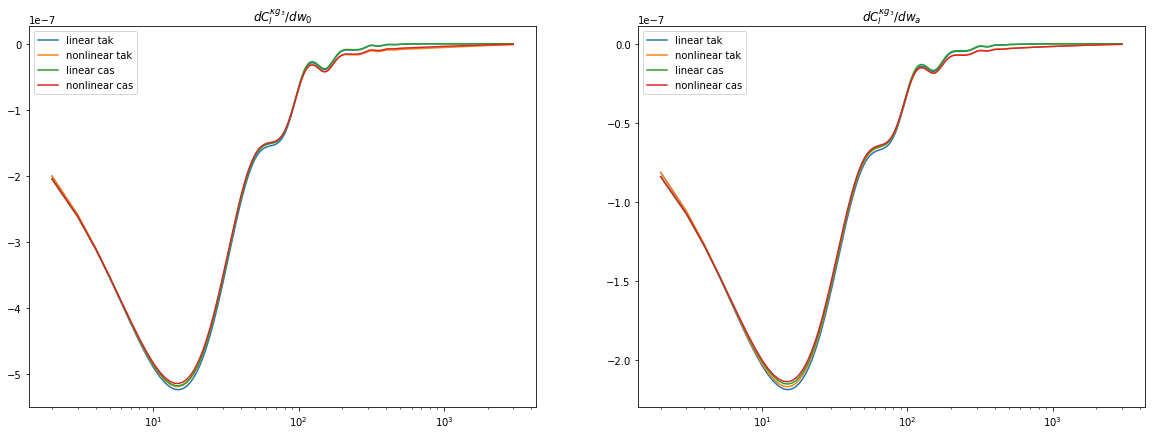

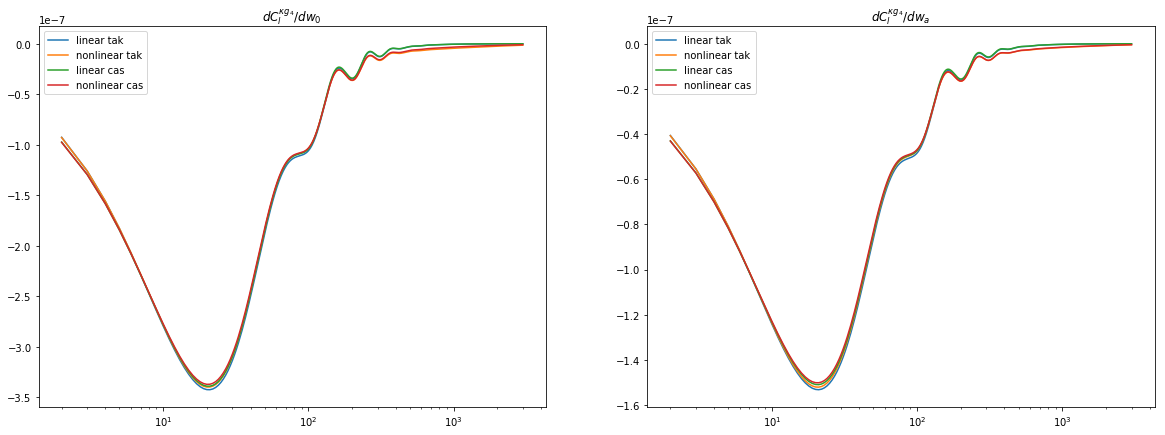

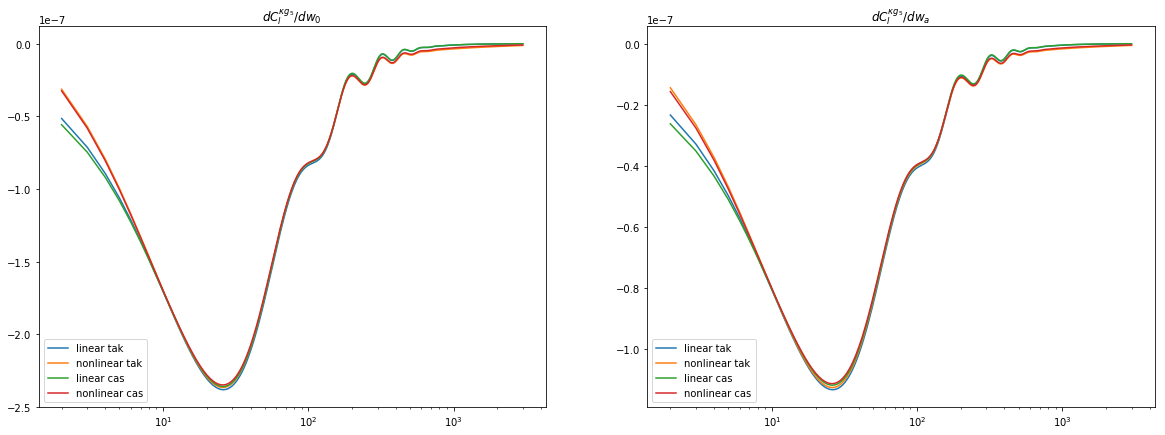

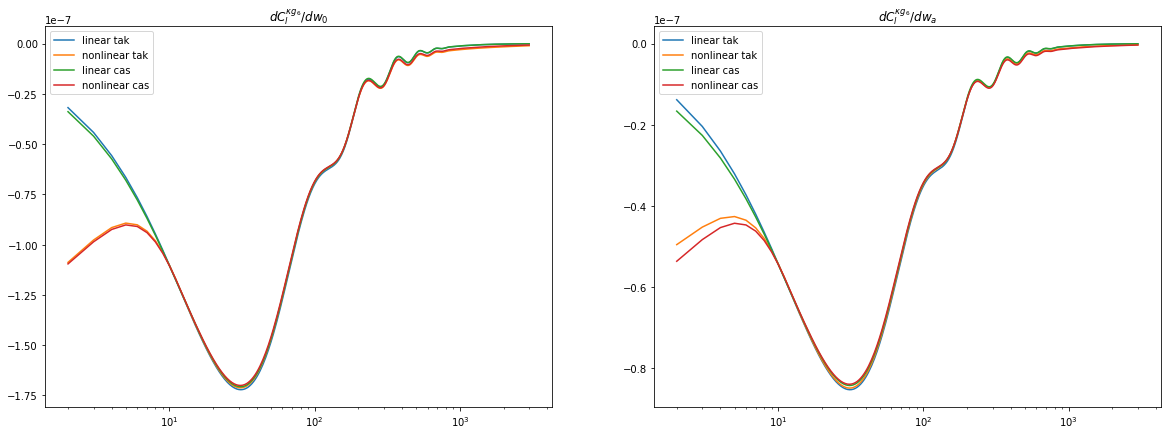

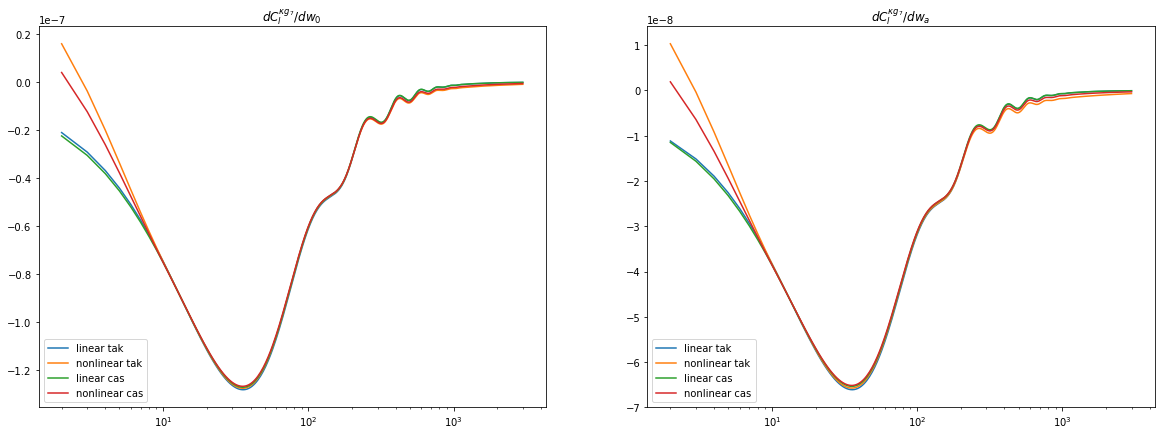

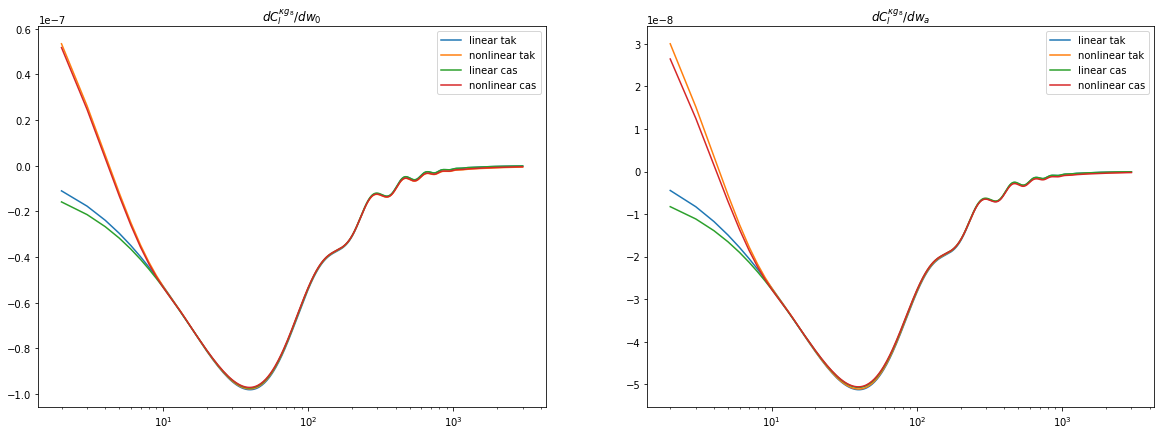

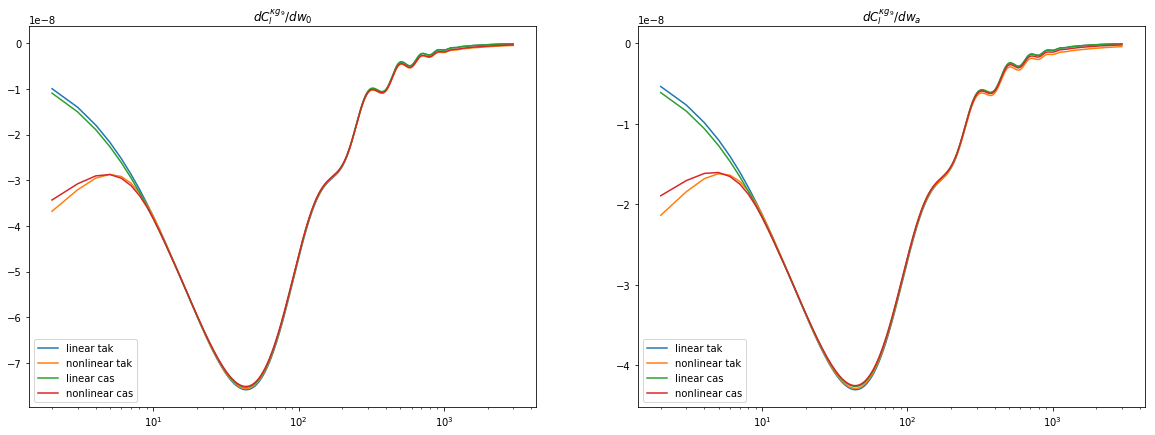

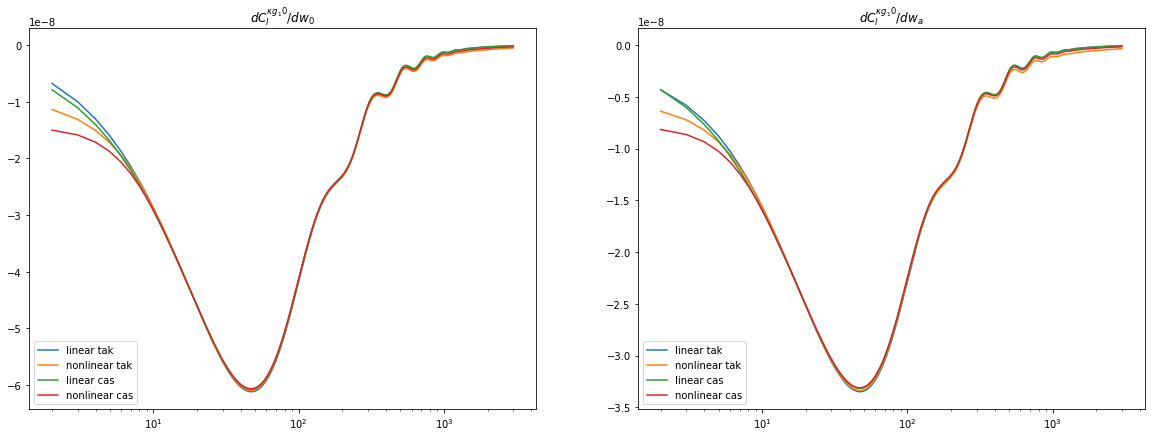

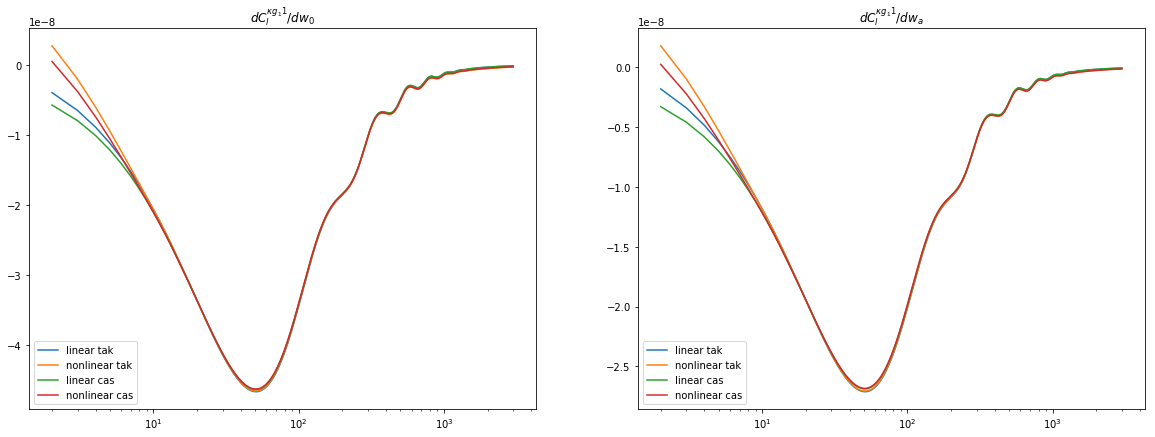

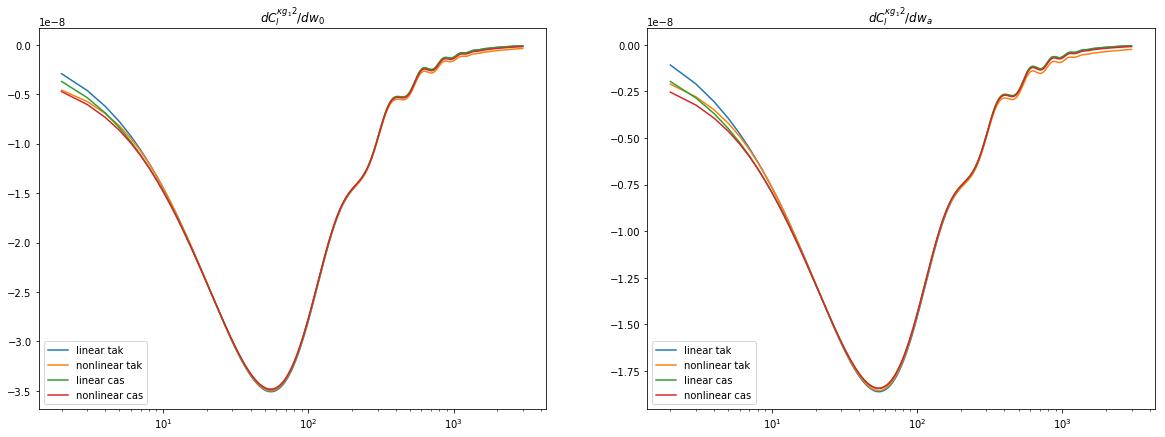

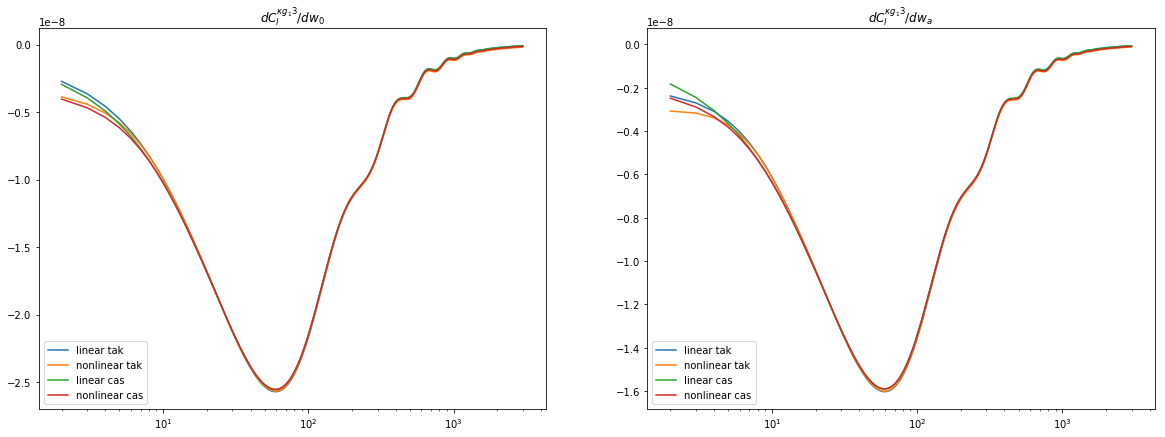

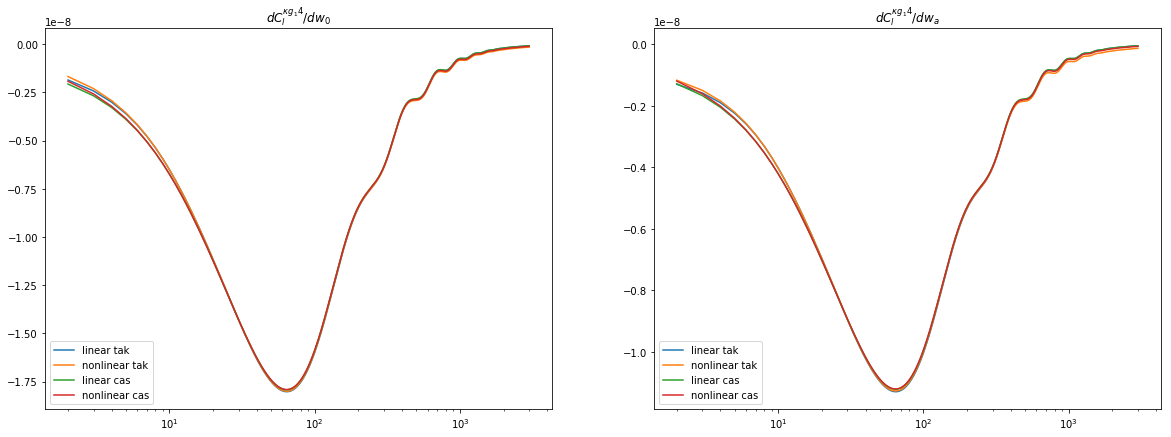

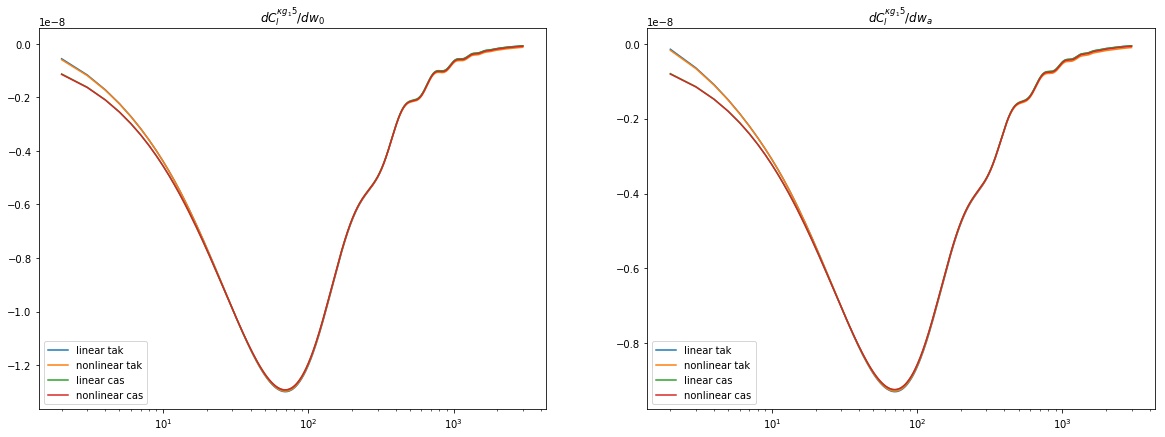

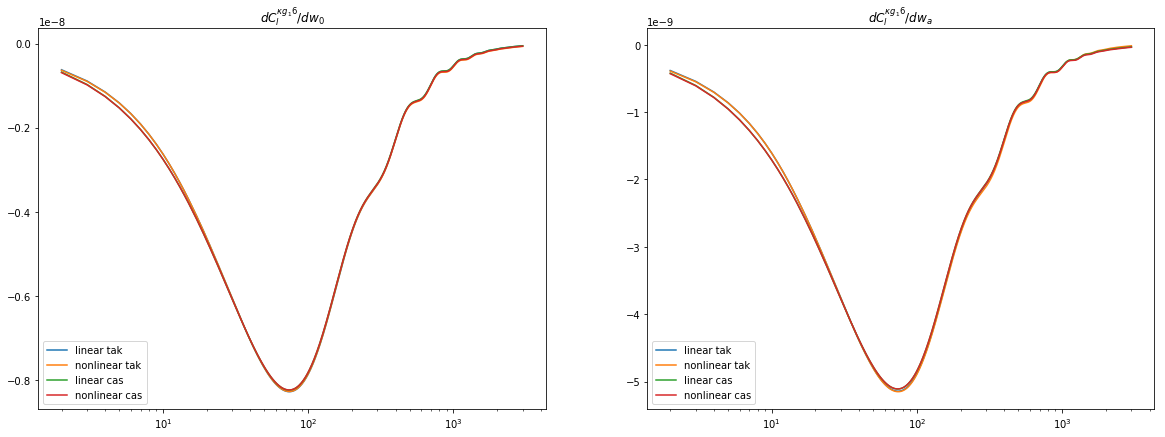

In [43]:
# look at some dCl/dw, dCl/dwa curves
w0Num = 7; waNum = 8
for specNum in range(nToPlot):
    fig = plt.figure(figsize=(20, 7))
    
    plt.subplot(1, 2, 1)
    plt.semilogx(ells,Fobj2.dClVecs[specNum,w0Num],label='linear tak')
    plt.semilogx(ells,Fobj4.dClVecs[specNum,w0Num],label='nonlinear tak')
    plt.semilogx(ells,dClVecs2[specNum,w0Num],label='linear cas')
    plt.semilogx(ells,dClVecs4[specNum,w0Num],label='nonlinear cas')
    plt.legend()
    plt.title(r'$dC_l^{{\kappa g_{0} }}/dw_0$'.format(specNum))
    #plt.show()
    
    plt.subplot(1, 2, 2)
    plt.semilogx(ells,Fobj2.dClVecs[specNum,waNum],label='linear tak')
    plt.semilogx(ells,Fobj4.dClVecs[specNum,waNum],label='nonlinear tak')
    plt.semilogx(ells,dClVecs2[specNum,waNum],label='linear cas')
    plt.semilogx(ells,dClVecs4[specNum,waNum],label='nonlinear cas')
    plt.legend()
    plt.title(r'$dC_l^{{\kappa g_{0} }}/dw_a$'.format(specNum))
    plt.show()
    

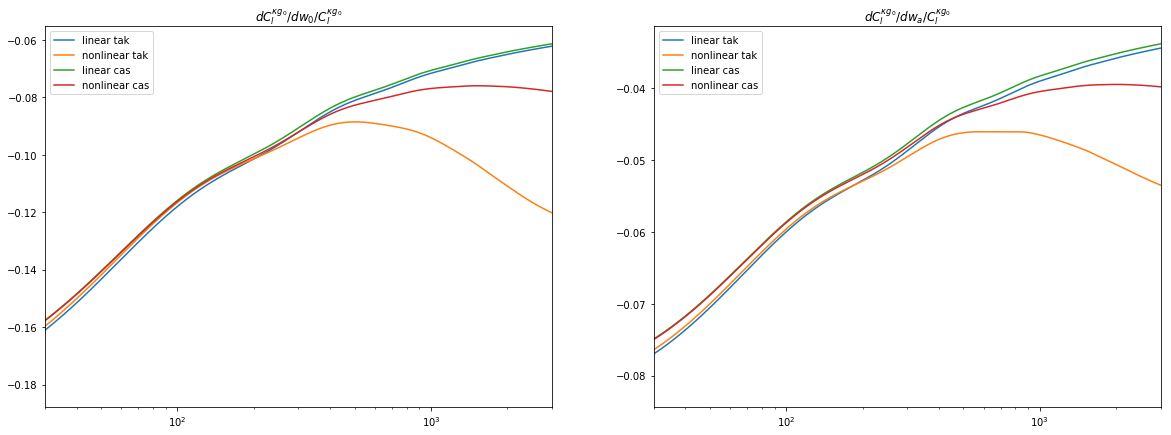

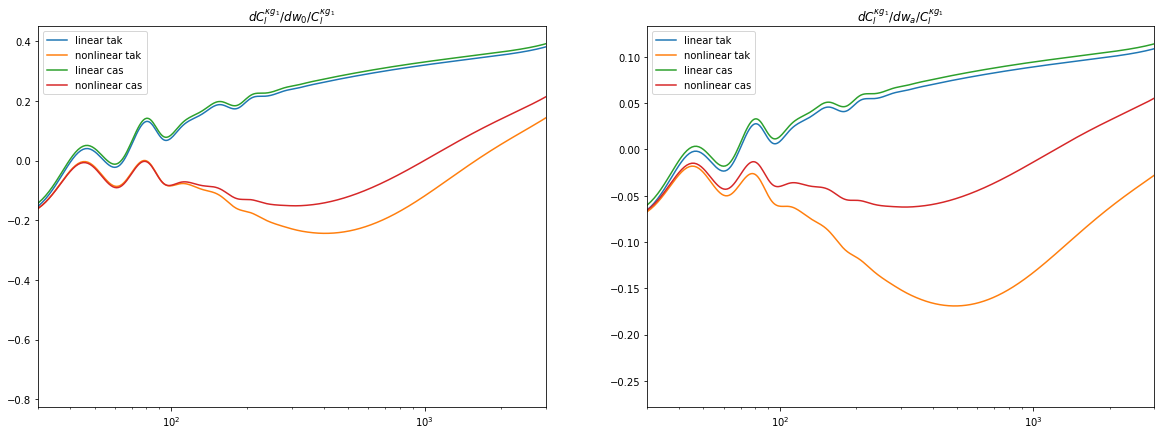

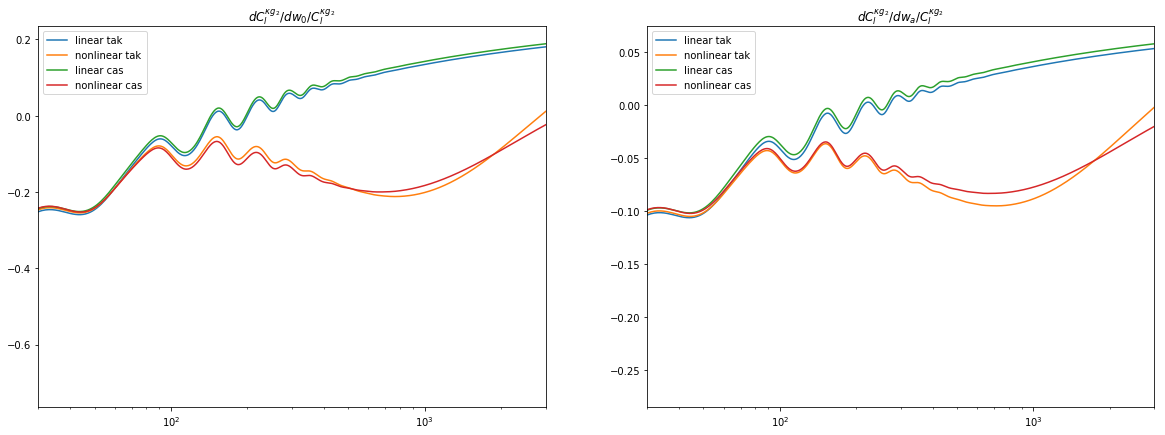

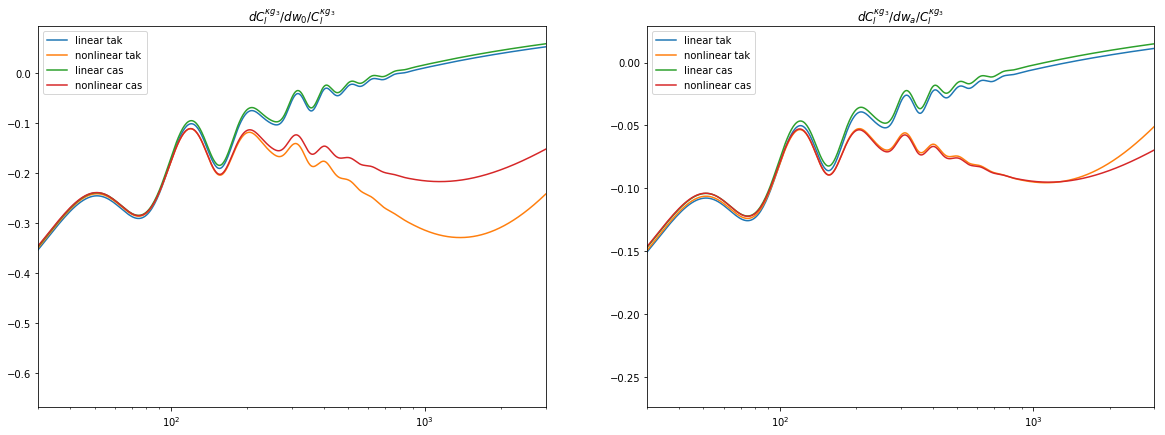

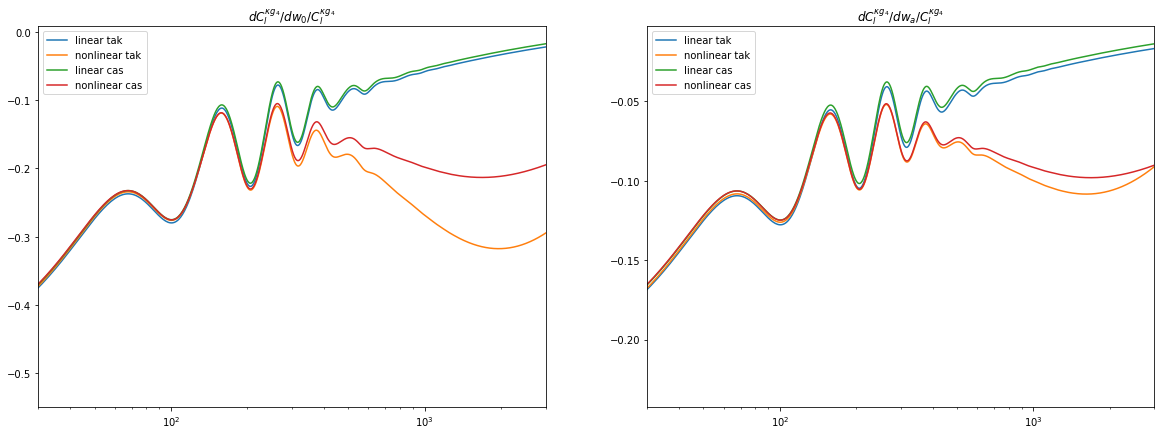

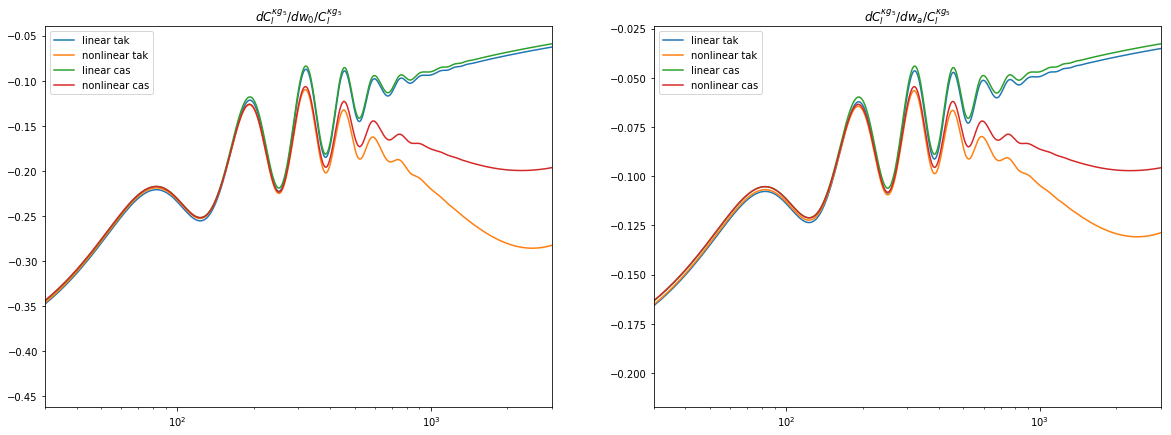

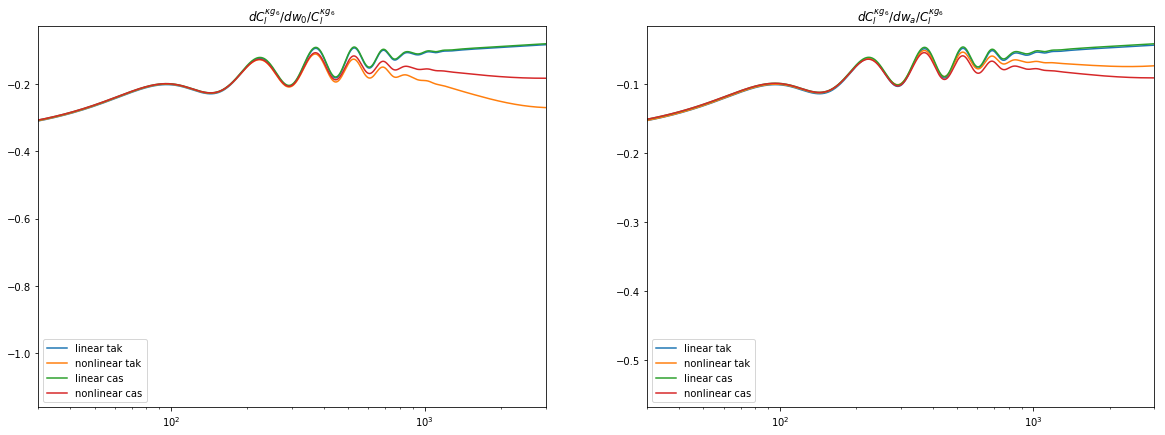

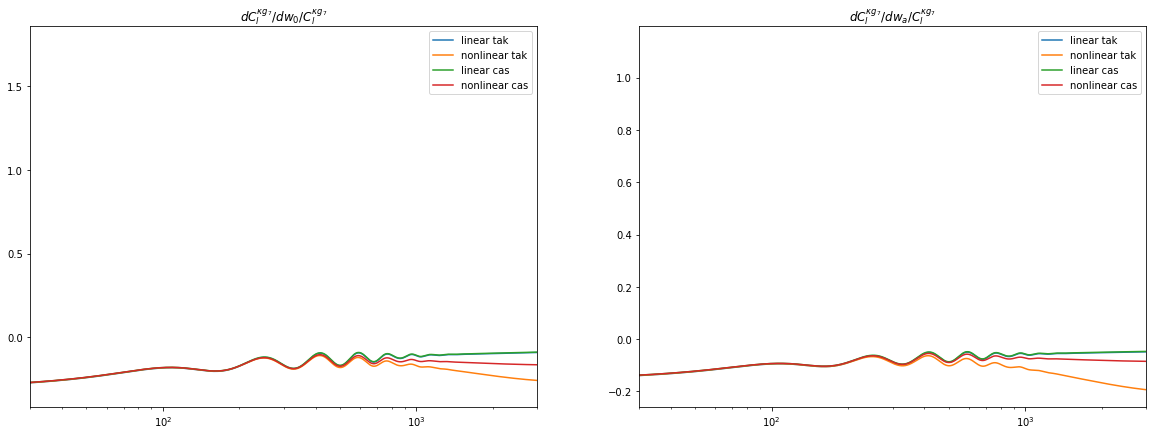

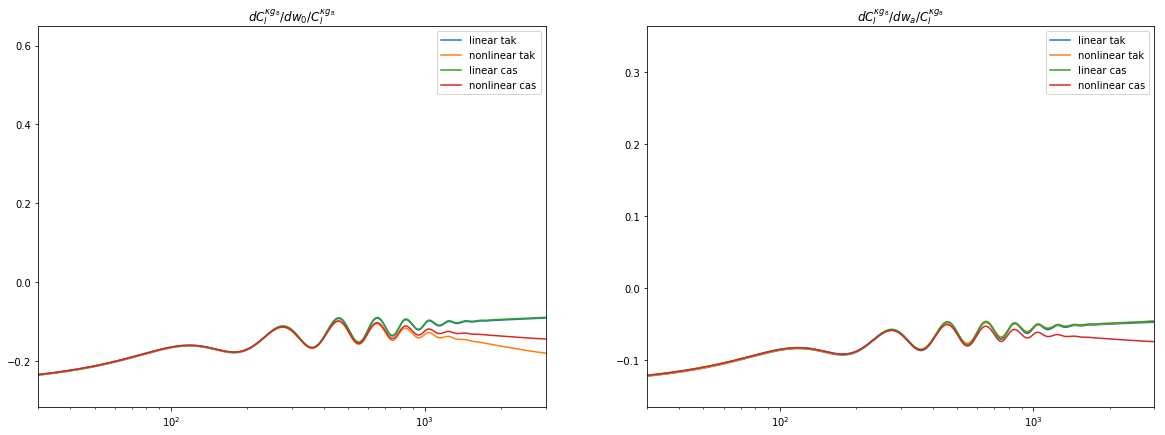

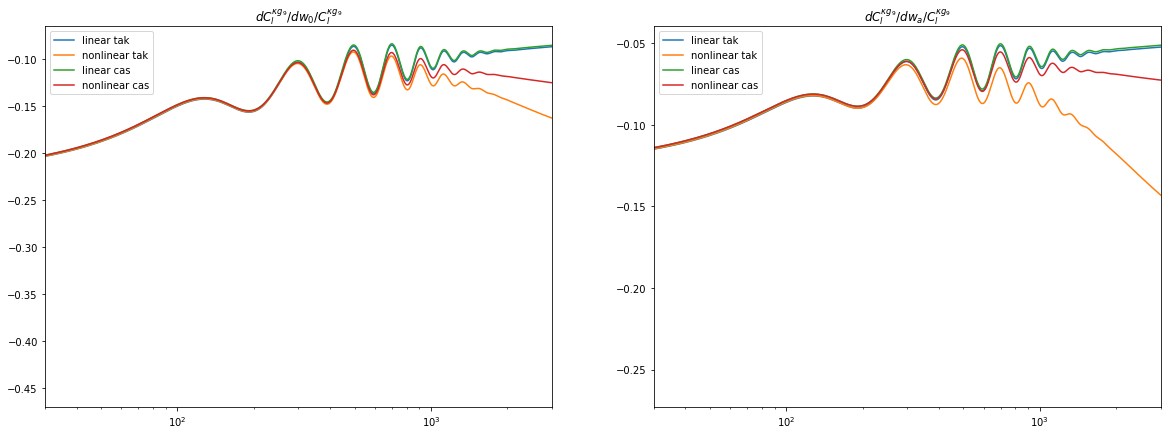

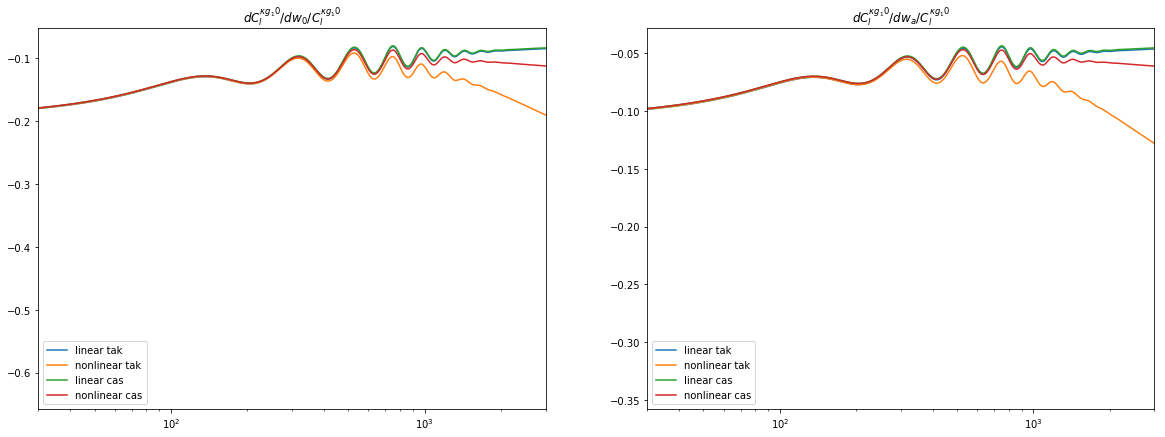

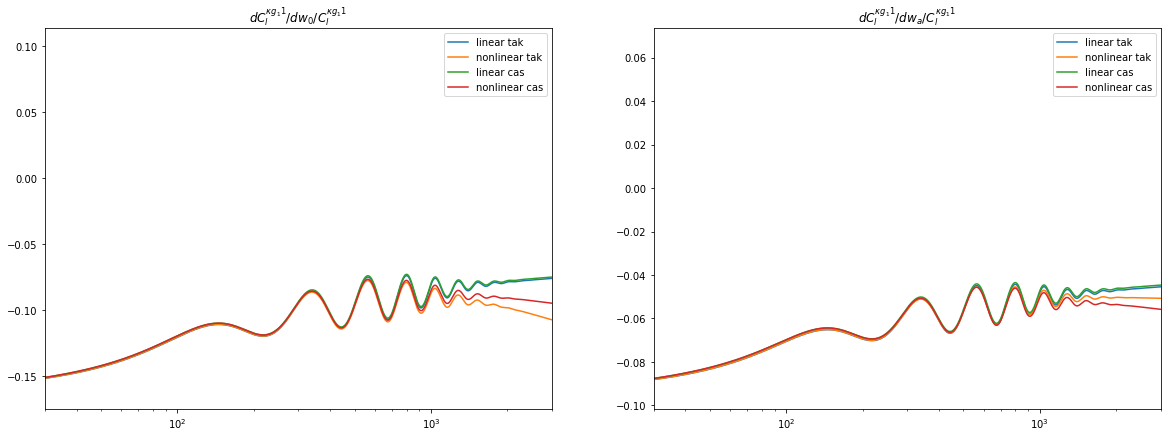

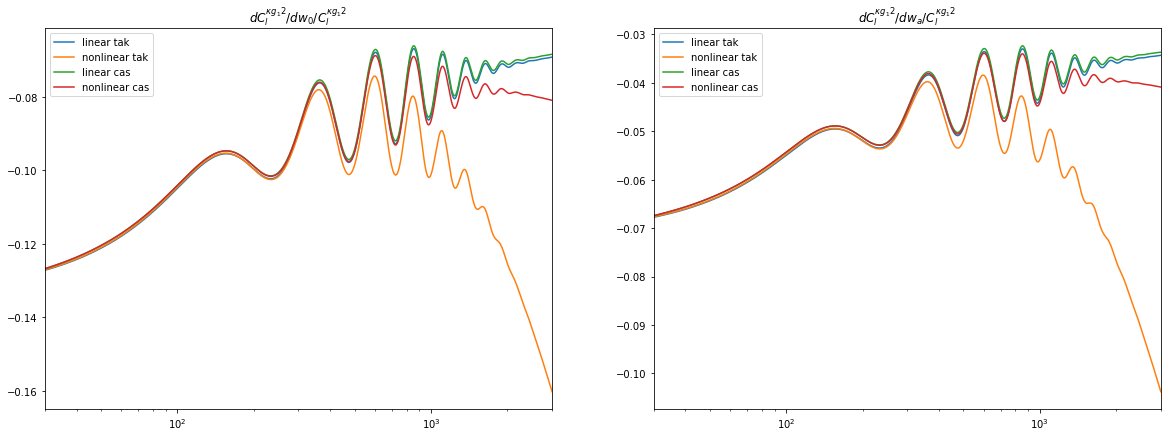

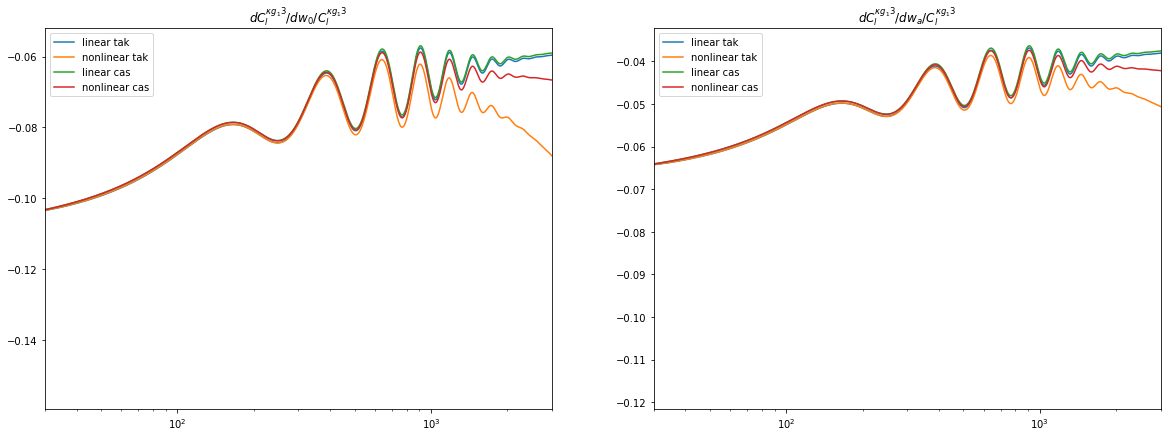

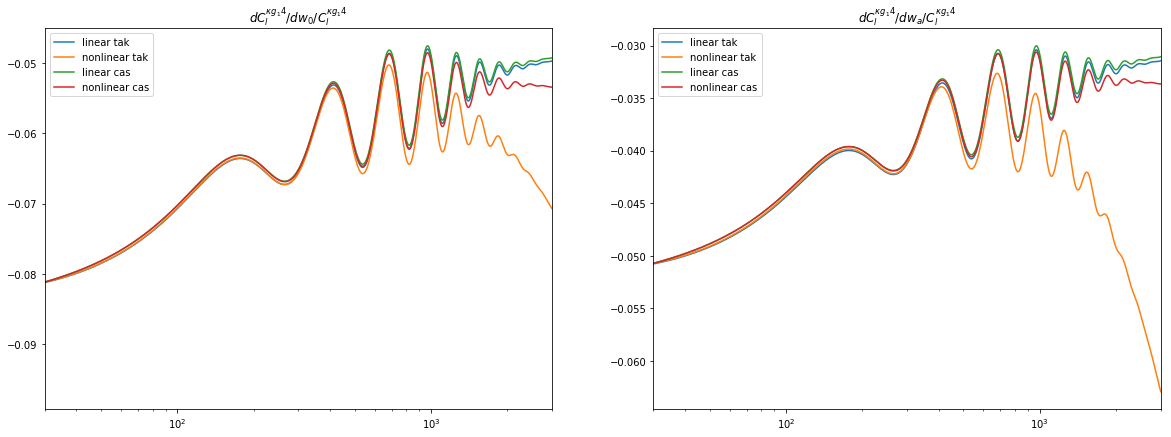

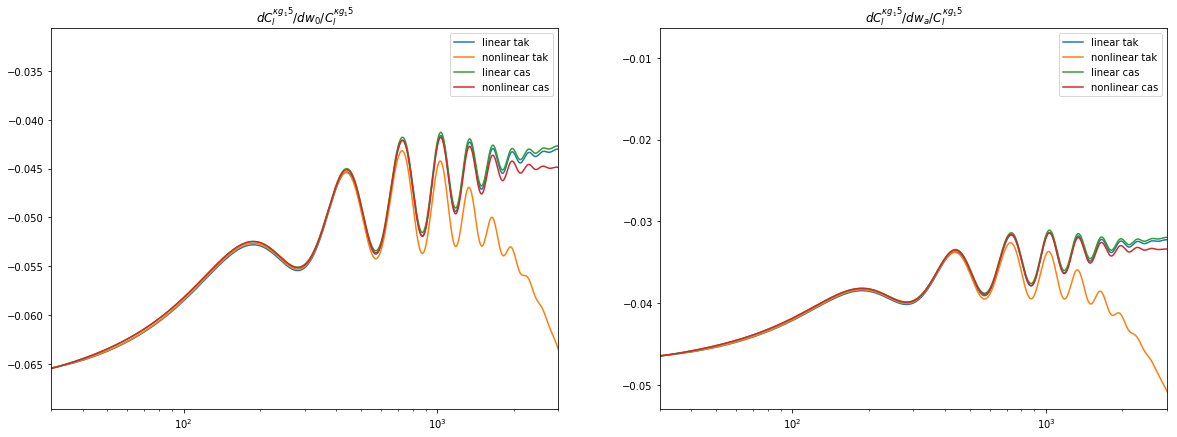

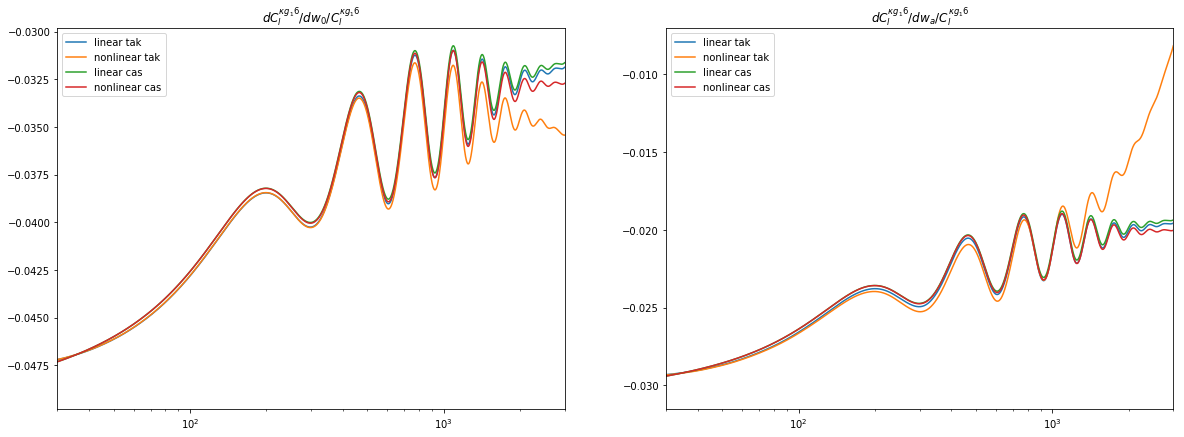

In [44]:
# same but dCl/dw /Cl
# look at some dCl/dw, dCl/dwa curves
w0Num = 7; waNum = 8
for specNum in range(nToPlot):
    fig = plt.figure(figsize=(20, 7))
    
    plt.subplot(1, 2, 1)
    plt.semilogx(ells,Fobj2.dClVecs[specNum,w0Num]/Fobj2.crossCls[0,specNum],label='linear tak')
    plt.semilogx(ells,Fobj4.dClVecs[specNum,w0Num]/Fobj4.crossCls[0,specNum],label='nonlinear tak')
    plt.semilogx(ells,dClVecs2[specNum,w0Num]/Fobj2.crossCls[0,specNum],label='linear cas')
    plt.semilogx(ells,dClVecs4[specNum,w0Num]/Fobj4.crossCls[0,specNum],label='nonlinear cas')
    plt.legend()
    plt.title(r'$dC_l^{{\kappa g_{0} }}/dw_0 / C_l^{{\kappa g_{0} }}$'.format(specNum))
    plt.xlim([30,3000])
    #plt.show()
    
    plt.subplot(1, 2, 2)
    plt.semilogx(ells,Fobj2.dClVecs[specNum,waNum]/Fobj2.crossCls[0,specNum],label='linear tak')
    plt.semilogx(ells,Fobj4.dClVecs[specNum,waNum]/Fobj4.crossCls[0,specNum],label='nonlinear tak')
    plt.semilogx(ells,dClVecs2[specNum,waNum]/Fobj2.crossCls[0,specNum],label='linear cas')
    plt.semilogx(ells,dClVecs4[specNum,waNum]/Fobj4.crossCls[0,specNum],label='nonlinear cas')
    plt.legend()
    plt.title(r'$dC_l^{{\kappa g_{0} }}/dw_a / C_l^{{\kappa g_{0} }}$'.format(specNum))
    plt.xlim([30,3000])
    plt.show()
    

In [45]:
# get sigmas from original Fobjs to compare against
Fijkg2 = Fobj2.makeFisher(30)
FijTE2 = Fobj2.makeFisher(30,TE=True)
Fijkg4 = Fobj4.makeFisher(30)
FijTE4 = Fobj4.makeFisher(30,TE=True)
print 'done.'

done.


In [46]:
def getSigmas(Fij):
    return np.sqrt(np.diag(np.linalg.inv(Fij)))
sigmas_kg2 = getSigmas(Fijkg2)
sigmas_TE2 = getSigmas(FijTE2)
sigmas_kg4 = getSigmas(Fijkg4)
sigmas_TE4 = getSigmas(FijTE4)
print 'done.'

done.


In [47]:
# Insert new quantities into Fobjs and get new sigmas
Fobj2.crossClsPlus = np.copy(crossClsPlus2)
Fobj2.crossClsMinus = np.copy(crossClsMinus2)
Fobj2.crossClsPPlus = np.copy(crossClsPPlus2)
Fobj2.crossClsPMinus = np.copy(crossClsPMinus2)
Fobj2.dClVecs = np.copy(dClVecs2)
Fobj2.dClVecsP = np.copy(dClVecsP2)

Fobj4.crossClsPlus = np.copy(crossClsPlus4)
Fobj4.crossClsMinus = np.copy(crossClsMinus4)
Fobj4.crossClsPPlus = np.copy(crossClsPPlus4)
Fobj4.crossClsPMinus = np.copy(crossClsPMinus4)
Fobj4.dClVecs = np.copy(dClVecs4)
Fobj4.dClVecsP = np.copy(dClVecsP4)

Fobj2.Fij = Fobj2.makeFisher(30)
Fobj2.FijTE = Fobj2.makeFisher(30,TE=True)
Fobj4.Fij = Fobj4.makeFisher(30)
Fobj4.FijTE = Fobj4.makeFisher(30,TE=True)


sigmas_kg2_new = getSigmas(Fobj2.Fij)
sigmas_TE2_new = getSigmas(Fobj2.FijTE)
sigmas_kg4_new = getSigmas(Fobj4.Fij)
sigmas_TE4_new = getSigmas(Fobj4.FijTE)
print 'done.'


done.


In [48]:
# print comparisons
from prettytable import PrettyTable
paramList = Fobj2.paramList

print 'kg linear'
t = PrettyTable(['Parameter','sigmas_before','sigmas_new','percent diff.'])
for i,p in enumerate(paramList):
    Zi = sigmas_kg2[i]
    Bi = sigmas_kg2_new[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'kg nonlinear'
t = PrettyTable(['Parameter','sigmas_before','sigmas_new','percent diff.'])
for i,p in enumerate(paramList):
    Zi = sigmas_kg4[i]
    Bi = sigmas_kg4_new[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'TE linear'
t = PrettyTable(['Parameter','sigmas_before','sigmas_new','percent diff.'])
for i,p in enumerate(paramList[:nCosParams]):
    Zi = sigmas_TE2[i]
    Bi = sigmas_TE2_new[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'TE nonlinear'
t = PrettyTable(['Parameter','sigmas_before','sigmas_new','percent diff.'])
for i,p in enumerate(paramList[:nCosParams]):
    Zi = sigmas_TE4[i]
    Bi = sigmas_TE4_new[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

kg linear
+---------------+---------------+------------+---------------+
|   Parameter   | sigmas_before | sigmas_new | percent diff. |
+---------------+---------------+------------+---------------+
|     ombh2     |    0.000741   |  0.000741  |    -0.0272    |
|     omch2     |    0.00205    |  0.00205   |     0.104     |
| cosmomc_theta |    2.91e-05   |  2.91e-05  |     -0.147    |
|       As      |    2.78e-11   |  2.77e-11  |     -0.184    |
|       ns      |    0.00261    |  0.00261   |     0.259     |
|      tau      |      6.75     |    6.63    |     -1.89     |
|      mnu      |     0.0391    |   0.0395   |      0.87     |
|       w       |     0.0784    |   0.0778   |     -0.751    |
|       wa      |     0.226     |   0.224    |     -0.741    |
|      bin1     |    0.00525    |  0.00539   |      2.62     |
|      bin2     |    0.00497    |  0.00509   |      2.36     |
|      bin3     |    0.00552    |  0.00563   |      1.98     |
|      bin4     |    0.00637    |   0.0065   

In [49]:
# check combined kgTE
def getFijSum(Fijkg,FijTE,nCosParams):
    FijSum = np.copy(Fijkg)
    FijSum[:nCosParams,:nCosParams] += np.copy(FijTE)
    return FijSum

FijSum2 = getFijSum(Fijkg2,FijTE2,nCosParams)
FijSum2_new = getFijSum(Fobj2.Fij,Fobj2.FijTE,nCosParams)
FijSum4 = getFijSum(Fijkg4,FijTE4,nCosParams)
FijSum4_new = getFijSum(Fobj4.Fij,Fobj4.FijTE,nCosParams)

sigmas_sum2 = getSigmas(FijSum2)
sigmas_sum2_new = getSigmas(FijSum2_new)
sigmas_sum4 = getSigmas(FijSum4)
sigmas_sum4_new = getSigmas(FijSum4_new)
print 'done.'

done.


In [50]:
print 'kgTE linear'
t = PrettyTable(['Parameter','sigmas_before','sigmas_new','percent diff.'])
for i,p in enumerate(paramList):
    Zi = sigmas_sum2[i]
    Bi = sigmas_sum2_new[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'kgTE nonlinear'
t = PrettyTable(['Parameter','sigmas_before','sigmas_new','percent diff.'])
for i,p in enumerate(paramList):
    Zi = sigmas_sum4[i]
    Bi = sigmas_sum4_new[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t


kgTE linear
+---------------+---------------+------------+---------------+
|   Parameter   | sigmas_before | sigmas_new | percent diff. |
+---------------+---------------+------------+---------------+
|     ombh2     |    7.17e-06   |  7.16e-06  |    -0.0406    |
|     omch2     |    0.000199   |  0.000201  |     0.971     |
| cosmomc_theta |    2.78e-07   |  2.8e-07   |     0.759     |
|       As      |    1.42e-11   |  1.42e-11  |     -0.122    |
|       ns      |    0.000787   |  0.000788  |     0.183     |
|      tau      |    0.00359    |  0.00359   |     -0.101    |
|      mnu      |     0.0194    |   0.0195   |     0.842     |
|       w       |     0.055     |   0.055    |     0.107     |
|       wa      |     0.141     |   0.141    |     0.457     |
|      bin1     |    0.00244    |  0.00245   |     0.785     |
|      bin2     |    0.00264    |  0.00262   |     -0.725    |
|      bin3     |    0.00321    |  0.00317   |     -1.15     |
|      bin4     |    0.00365    |  0.00362 

In [51]:
# Save the modified Fisher Objects

#filehandler_lin = open('Fisher_7_16O_dP3.obj','w') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,
#neutrino_hierarchy = 'degenerate', usePrimaryCMB = True; dndzMode = 2 (Gold); from FisherCl branch quickCl
# set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True, nbar = 40
# uses nBins=16 bin version with beesBins v16; modified cp.byeBiasFit to use b(z)=1+z instead of standard 1+0.84*z
# shot noise without b^2, kk noise converted from pp (not dd), kk noise divided by 2.5
# fiducial w = -0.95; Casarini Halofit version

#filehandler_lin = open('Fisher_7_16N_dP.obj','w') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,
#neutrino_hierarchy = 'degenerate', usePrimaryCMB = True; dndzMode = 1 (kludged); from FisherCl branch quickCl
# kludge for this one: told cp.getDNDZinterp to use getDNDZM (Optimistic); set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True, nbar = 66
# uses nBins=16 bin version with beesBins v16; modified cp.byeBiasFit to use b(z)=1+z instead of standard 1+0.84*z
# shot noise without b^2, kk noise converted from pp (not dd), kk noise divided by 2.5
# fiducial w = -0.95; Casarini Halofit version

#filehandler_nln = open('Fisher_7_16M_dP3.obj','w') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#neutrino_hierarchy = 'degenerate', usePrimaryCMB = True; dndzMode = 2 (Gold); from FisherCl branch quickCl
# set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True, nbar = 40
# uses nBins=16 bin version with beesBins v16; modified cp.byeBiasFit to use b(z)=1+z instead of standard 1+0.84*z
# shot noise without b^2, kk noise converted from pp (not dd), kk noise divided by 2.5
# fiducial w = -0.95; Casarini Halofit version

#filehandler_nln = open('Fisher_7_16Ln0_dP.obj','w') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#neutrino_hierarchy = 'degenerate', usePrimaryCMB = True; dndzMode = 1 (kludged); from FisherCl branch quickCl
# kludge for this one: told cp.getDNDZinterp to use getDNDZM (Optimistic); set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True, nbar = 66 ('n0' indicates fix)
# uses nBins=16 bin version with beesBins v16; modified cp.byeBiasFit to use b(z)=1+z instead of standard 1+0.84*z
# shot noise without b^2, kk noise converted from pp (not dd), kk noise divided by 2.5
# fiducial w = -0.95; Casarini Halofit version



#pickle.dump(Fobj2,filehandler_lin)
#pickle.dump(Fobj4,filehandler_nln)
#filehandler_lin.close()
#filehandler_nln.close()
print 'done.'


done.


In [52]:
# check affect of fixing wa
# define row,col deleting function
def fixParam(Fij,pNum):
    return np.delete(np.delete(Fij,pNum,0),pNum,1)
waIndex = 8

FijSum2_nowa = fixParam(FijSum2,waIndex)
FijSum2_new_nowa = fixParam(FijSum2_new,waIndex)
FijSum4_nowa = fixParam(FijSum4,waIndex)
FijSum4_new_nowa = fixParam(FijSum4_new,waIndex)

sigmas_sum2_nowa = getSigmas(FijSum2_nowa)
sigmas_sum2_new_nowa = getSigmas(FijSum2_new_nowa)
sigmas_sum4_nowa = getSigmas(FijSum4_nowa)
sigmas_sum4_new_nowa = getSigmas(FijSum4_new_nowa)
print 'done.'

done.


In [53]:
paramList = np.delete(paramList,waIndex)
print paramList

['ombh2' 'omch2' 'cosmomc_theta' 'As' 'ns' 'tau' 'mnu' 'w' 'bin1' 'bin2'
 'bin3' 'bin4' 'bin5' 'bin6' 'bin7' 'bin8' 'bin9' 'bin10' 'bin11' 'bin12'
 'bin13' 'bin14' 'bin15' 'bin16']


In [54]:
print 'kgTE linear, wa fixed'
t = PrettyTable(['Parameter','sigmas_before','sigmas_new','percent diff.'])
for i,p in enumerate(paramList):
    Zi = sigmas_sum2_nowa[i]
    Bi = sigmas_sum2_new_nowa[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'kgTE nonlinear, wa fixed'
t = PrettyTable(['Parameter','sigmas_before','sigmas_new','percent diff.'])
for i,p in enumerate(paramList):
    Zi = sigmas_sum4_nowa[i]
    Bi = sigmas_sum4_new_nowa[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t


kgTE linear, wa fixed
+---------------+---------------+------------+---------------+
|   Parameter   | sigmas_before | sigmas_new | percent diff. |
+---------------+---------------+------------+---------------+
|     ombh2     |    7.17e-06   |  7.16e-06  |    -0.0441    |
|     omch2     |    0.000177   |  0.000177  |     0.0677    |
| cosmomc_theta |    2.58e-07   |  2.59e-07  |      0.14     |
|       As      |    1.39e-11   |  1.39e-11  |     0.116     |
|       ns      |    0.000768   |  0.000767  |    -0.0967    |
|      tau      |    0.00351    |  0.00352   |     0.0952    |
|      mnu      |     0.0185    |   0.0186   |     0.321     |
|       w       |     0.0123    |   0.0124   |     0.254     |
|      bin1     |    0.00235    |  0.00234   |     -0.546    |
|      bin2     |     0.0026    |   0.0026   |     0.0863    |
|      bin3     |    0.00301    |  0.00302   |     0.472     |
|      bin4     |    0.00345    |  0.00347   |     0.613     |
|      bin5     |    0.00392    |

In [55]:
# Fixing wa has caused the "before" and "new" cases to converge, as expected.
# However, there is still discrepancy between the linear and nonlinear cases.
# However again, there has been no k-limit imposed on these and therefore ell goes well into the nonlinear regime.

In [56]:
# re-arrange pieces to fix earlier screw-up
"""
# load FisherMatrix objects
import FisherCl as fcl
import noiseCl as ncl
import crosspower as cp
import pickle

filehandler_lin_mixed = open('Fisher_7_16O_dP_mixed.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,
filehandler_nln_mixed = open('Fisher_7_16M_dP_mixed.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
filehandler_lin_chi = open('Fisher_7_16Ochi.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,
filehandler_nln_chi = open('Fisher_7_16Mchi.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,

# do two at a time
#Fobj_mixed = pickle.load(filehandler_lin_mixed) 
#Fobj_chi = pickle.load(filehandler_lin_chi) 

Fobj_mixed = pickle.load(filehandler_nln_mixed) 
Fobj_chi = pickle.load(filehandler_nln_chi) 
print 'files opened.'


Fobj_chi.crossClsPlus = Fobj_mixed.crossClsPlus
Fobj_chi.crossClsMinus = Fobj_mixed.crossClsMinus
Fobj_chi.dClVecs = Fobj_mixed.dClVecs
Fobj_chi.Fij = Fobj_mixed.Fij



# just do one that matches the two selected above
#filehandler_lin = open('Fisher_7_16Ochi_dP.obj','w') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,
#pickle.dump(Fobj_chi,filehandler_lin)
#filehandler_lin.close()

filehandler_nln = open('Fisher_7_16Mchi_dP.obj','w') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
pickle.dump(Fobj_chi,filehandler_nln)
filehandler_nln.close()
print 'done.'

"""


"\n# load FisherMatrix objects\nimport FisherCl as fcl\nimport noiseCl as ncl\nimport crosspower as cp\nimport pickle\n\nfilehandler_lin_mixed = open('Fisher_7_16O_dP_mixed.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,\nfilehandler_nln_mixed = open('Fisher_7_16M_dP_mixed.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,\nfilehandler_lin_chi = open('Fisher_7_16Ochi.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,\nfilehandler_nln_chi = open('Fisher_7_16Mchi.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,\n\n# do two at a time\n#Fobj_mixed = pickle.load(filehandler_lin_mixed) \n#Fobj_chi = pickle.load(filehandler_lin_chi) \n\nFobj_mixed = pickle.load(filehandler_nln_mixed) \nFobj_chi = pickle.load(filehandler_nln_chi) \nprint 'files opened.'\n\n\nFobj_chi.crossClsPlus = Fobj_mixed.crossClsPlus\nFobj_chi.crossClsMinus = Fobj_mixed.crossClsMinus\nFobj_chi.dClVecs = Fobj_mixed.dC